In [6]:
#load packages
import os
import anndata as ad
import scimap as sm

import scanpy as sp
import pandas as pd
import numpy as np
import napari as napari
import math
import seaborn as sns
import itertools

from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from matplotlib.colors import Normalize

Running SCIMAP  2.2.11


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [91]:
project_dir = "/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/feature_extraction_all/Case1-38/"
os.chdir(project_dir)

In [8]:
#Marker subsets
AP1s = ['cFOS', 'FRA1','FRA2','cJUN','JUNB','JUND']
Diff_state_markers = ['MITF','SOX10','PRAME','AXL','SOX9','NGFR']

In [ ]:
tumor_adata= ad.read_h5ad("Case3-7_tumor_adata.h5ad")


In [93]:
#Read in data
project_dir = "/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/feature_extraction_all/Case1-38/"
feature_table_path=[project_dir + "Case1-38_R1_feature-extraction.csv"]
adata = sm.pp.mcmicro_to_scimap(feature_table_path)


Loading Case1-38_R1_feature-extraction.csv


In [94]:
sm.pp.log1p(adata, layer='log', verbose=True) #make a log layer

AnnData object with n_obs × n_vars = 29995 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log'

In [95]:
adata

AnnData object with n_obs × n_vars = 29995 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log'

In [96]:

    # Store the log1p-transformed data as a new layer in the original adata
adata.layers["log1p_raw"] = np.log1p(adata.raw.X)

In [97]:
#Zscore marker expression values
adata.layers["zscore"] = stats.zscore(adata.layers["log1p_raw"], axis = 0)
adata

AnnData object with n_obs × n_vars = 29995 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log', 'log1p_raw', 'zscore'

In [19]:
def replace_phenotype(adata, old_value, new_value):
    for i,r in adata.obs.iterrows():
        if r['phenotype']==old_value:
            adata.obs.loc[i,'phenotype'] = new_value
            
    return adata

In [58]:
adata = ad.read_h5ad('/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/feature_extraction_all/Case2-7/Case2-7_phenotype.h5ad')

In [59]:
adata.obs['ROI'].value_counts()

ROI
Tumor    455666
Other     51003
Name: count, dtype: int64

In [100]:
###add ROIS
%gui qt
image_path ="/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/Case1-38_R1/background/Case1-38_R1_bgsub_final.ome.tif"
sm.pl.addROI_image(image_path, adata, channel_names ='Hoechst', markers = 'Hoechst')



        Opening Napari;
        Add shape layers (on left) to draw ROI's. 
        Rename the shape layer to give a name to your ROI
        Multiple shape layers are supported
        ROI's should not overlap
        Close Napari to save ROI's.
        
Identifying cells within selected ROI's
ROIs saved under adata.obs['ROI']


AnnData object with n_obs × n_vars = 29995 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI'
    uns: 'all_markers'
    layers: 'log', 'log1p_raw', 'zscore'

In [101]:
adata

AnnData object with n_obs × n_vars = 29995 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI'
    uns: 'all_markers'
    layers: 'log', 'log1p_raw', 'zscore'

In [103]:
tumor_adata.obs['ROI'].value_counts()


ROI
Tumor    282814
Name: count, dtype: int64

In [398]:
#look at data
print(adata.X)
print(adata.var)
adata


[[0.70935991 0.62693179 0.68764671 ... 0.53322377 0.39292092 0.34816292]
 [0.75249152 0.37318098 0.54595497 ... 0.45947362 0.34858783 0.58040923]
 [0.68955211 0.34565396 0.52629825 ... 0.51304161 0.32544923 0.55662045]
 ...
 [0.62151718 0.54522445 0.6266806  ... 0.33293029 0.05307577 0.15327334]
 [0.70857551 0.30621535 0.5448841  ... 0.59163608 0.35189015 0.60005889]
 [0.73918561 0.30890923 0.51356263 ... 0.36980617 0.59648421 0.30160857]]
Empty DataFrame
Columns: []
Index: [Hoechst, PRAME, MITF, JUND, SOX10, cJUN, cFOS, NGFR, Ki67, AXL, CD45, FAP, FRA1, SOX9, FRA2, CD4, JUNB]


AnnData object with n_obs × n_vars = 445747 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'phenotype', 'phenotype_category'
    uns: 'all_markers', 'gates'
    layers: 'log', 'log1p_raw', 'zscore'

In [17]:
#read in manual gates and scale
marker_gates = pd.read_csv('Case2-7_markergates.csv',
    header = [0], index_col =[0])

adata.uns['gates'] = marker_gates

In [105]:
image_path="/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/Case1-38_R1/background/Case1-38_R1_bgsub_final.ome.tif"
sm.pl.napariGater (image_path, adata)

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_9551/239232341.py:2: UserWarning:

NOTE: napariGater() is currently in beta testing. If you encounter any issues, please report them at: https://github.com/labsyspharm/scimap/issues



Initializing...
Initializing gates with GMM...


Loading image data...
Calculating contrast settings...


Saved contrast settings for Case1-38_R1_feature-extraction with 17 channels
Initialization completed in 2.80 seconds
Opening napari viewer...
Napari viewer initialized in 5.57 seconds


Gate confirmed for CD45 at 5.00


Gate confirmed for AXL at 5.50


Gate confirmed for FAP at 5.45


Gate confirmed for MITF at 5.20


Gate confirmed for PRAME at 4.55
Gate confirmed for SOX10 at 5.30
Gate confirmed for SOX9 at 5.80


In [108]:
sm.pp.rescale(adata, gate=adata.uns['gates'])


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:145: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: Case1-38_R1_feature-extraction
Scaling Hoechst (gate: 8.094)
Scaling PRAME (gate: 4.550)
Scaling MITF (gate: 5.200)
Scaling JUND (gate: 3.837)
Scaling SOX10 (gate: 5.300)
Scaling cJUN (gate: 4.202)
Scaling cFOS (gate: 4.419)
Scaling NGFR (gate: 5.592)
Scaling Ki67 (gate: 3.700)
Scaling AXL (gate: 5.500)
Scaling CD45 (gate: 5.000)
Scaling FAP (gate: 5.450)
Scaling FRA1 (gate: 4.604)
Scaling SOX9 (gate: 5.800)
Scaling FRA2 (gate: 3.950)
Scaling CD4 (gate: 3.527)
Scaling JUNB (gate: 4.281)


AnnData object with n_obs × n_vars = 29995 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'phenotype'
    uns: 'all_markers', 'gates', 'napariGaterProvenance', 'image_contrast_settings'
    layers: 'log', 'log1p_raw', 'zscore'

In [608]:
adata.obs['ROI'].value_counts()

ROI
Tumor    453575
Other     53094
Name: count, dtype: int64

In [119]:
phenotype = pd.read_csv('/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/feature_extraction_all/20250408_phenotyping_workflow_allcombinations.csv')
phenotype.style.format(na_rep='')
adata= sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 


Phenotyping Tumor cell
Phenotyping Fibroblast
Phenotyping Immune Cell
-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ NGFR+ SOX9+ PRAME+
Phenotyping MITF+ SOX10+ NGFR+ SOX9+
Phenotyping MITF+ SOX10+ NGFR+ PRAME+
Phenotyping MITF+ SOX10+ SOX9+ PRAME+
Phenotyping MITF+ NGFR+ SOX9+ PRAME+
Phenotyping SOX10+ NGFR+ SOX9+ PRAME+
Phenotyping MITF+ SOX10+ NGFR+
Phenotyping MITF+ SOX10+ SOX9+
Phenotyping MITF+ SOX10+ PRAME+
Phenotyping MITF+ NGFR+ SOX9+
Phenotyping MITF+ NGFR+ PRAME+
Phenotyping MITF+ SOX9+ PRAME+
Phenotyping SOX10+ NGFR+ SOX9+
Phenotyping SOX10+ NGFR+ PRAME+
Phenotyping SOX10+ SOX9+ PRAME+
Phenotyping NGFR+ SOX9+ PRAME+
Phenotyping MITF+ SOX10+
Phenotyping MITF+ NGFR+
Phenotyping MITF+ SOX9+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ PRAME+
Phenotyping SOX10+ NGFR+
Phenotyping SOX10+ SOX9+
Phenotyping SOX10+ PRAME+
Phenotyping NGFR+ SOX9+
Phenotyping NGFR+ PRAME+
Phenotyping SOX9+ PRAME+
Phenotyping PRAME+
Phenotyping MITF+
Phenotyping SOX10+
Phenotyping NGFR+
Phenotyping SOX9+
Phenotyping MITF+ AXL+
Phenotyping SOX10+ AXL+
Phenotyping NGFR+ AXL+
Phenotyping SOX9+ AXL+
Phenotyping PRAME+ AXL+
Phenotyping MITF+ SOX10+ AXL+
Phenotyping MITF+ NGFR+ AXL+
Phenotyping MITF+ SOX9+ AXL+
Phenotyping MITF+ PRAME+ AXL+
Phenotyping SOX10+ NGFR+ AXL+
Phenotyping SOX10+ SOX9+ AXL+
Phenotyping SOX10+ PRAME+ AXL+
Phenotyping NGFR+ SOX9+ AXL+
Phenotyping NGFR+ PRAME+ AXL+
Phenotyping SOX9+ PRAME+ AXL+
Phenotyping MITF+ SOX10+ NGFR+ AXL+
Phenotyping MITF+ SOX10+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ AXL+
Phenotyping MITF+ NGFR+ SOX9+ AXL+
Phenotyping MITF+ NGFR+ PRAME+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX9+ PRAME+ AXL+
Phenotyping SOX10+ NGFR+ SOX9+ AXL+
Phenotyping SOX10+ NGFR+ PRAME+ AXL+
Phenotyping SOX10+ SOX9+ PRAME+ AXL+
Phenotyping NGFR+ SOX9+ PRAME+ AXL+
Phenotyping AXL+
Phenotyping MITF+ SOX10+ NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ NGFR+ PRAME+ AXL+
Phenotyping MITF+ SOX10+ SOX9+ PRAME+ AXL+
Phenotyping MITF+ NGFR+ SOX9+ PRAME+ AXL+
Phenotyping SOX10+ NGFR+ SOX9+ PRAME+ AXL+
Phenotyping MITF+ SOX10+ NGFR+ SOX9+ PRAME+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [62]:
adata = replace_phenotype(adata, 'Tumor cell', 'Unknown')

In [63]:
adata.write_h5ad('Case2-7_phenotype.h5ad')

In [120]:
print(adata.obs['phenotype'].value_counts())


phenotype
Unknown                                 12258
MITF+ SOX10+ NGFR+ SOX9+                 2473
Tumor cell                               1816
MITF+ SOX10+ SOX9+                       1777
SOX10+ SOX9+                             1413
Fibroblast                               1398
Immune Cell                              1229
SOX9+                                    1227
MITF+ SOX10+ NGFR+ SOX9+ PRAME+          1091
NGFR+ SOX9+                              1002
PRAME+                                    805
SOX10+ NGFR+ SOX9+                        795
MITF+                                     418
MITF+ NGFR+ SOX9+                         271
SOX10+                                    258
MITF+ SOX10+ SOX9+ PRAME+                 182
MITF+ NGFR+                               166
NGFR+ PRAME+                              166
SOX10+ NGFR+ SOX9+ PRAME+                 164
SOX10+ NGFR+                              110
MITF+ SOX9+                               110
MITF+ SOX10+            

                                 count
phenotype                             
Unknown                          12258
MITF+ SOX10+ NGFR+ SOX9+          2473
Tumor cell                        1816
MITF+ SOX10+ SOX9+                1777
SOX10+ SOX9+                      1413
Fibroblast                        1398
Immune Cell                       1229
SOX9+                             1227
MITF+ SOX10+ NGFR+ SOX9+ PRAME+   1091
NGFR+ SOX9+                       1002
PRAME+                             805
SOX10+ NGFR+ SOX9+                 795
MITF+                              418
MITF+ NGFR+ SOX9+                  271
SOX10+                             258
MITF+ SOX10+ SOX9+ PRAME+          182
MITF+ NGFR+                        166
NGFR+ PRAME+                       166
SOX10+ NGFR+ SOX9+ PRAME+          164
SOX10+ NGFR+                       110
MITF+ SOX9+                        110
MITF+ SOX10+                       104
SOX9+ PRAME+                        75
NGFR+ SOX9+ PRAME+       

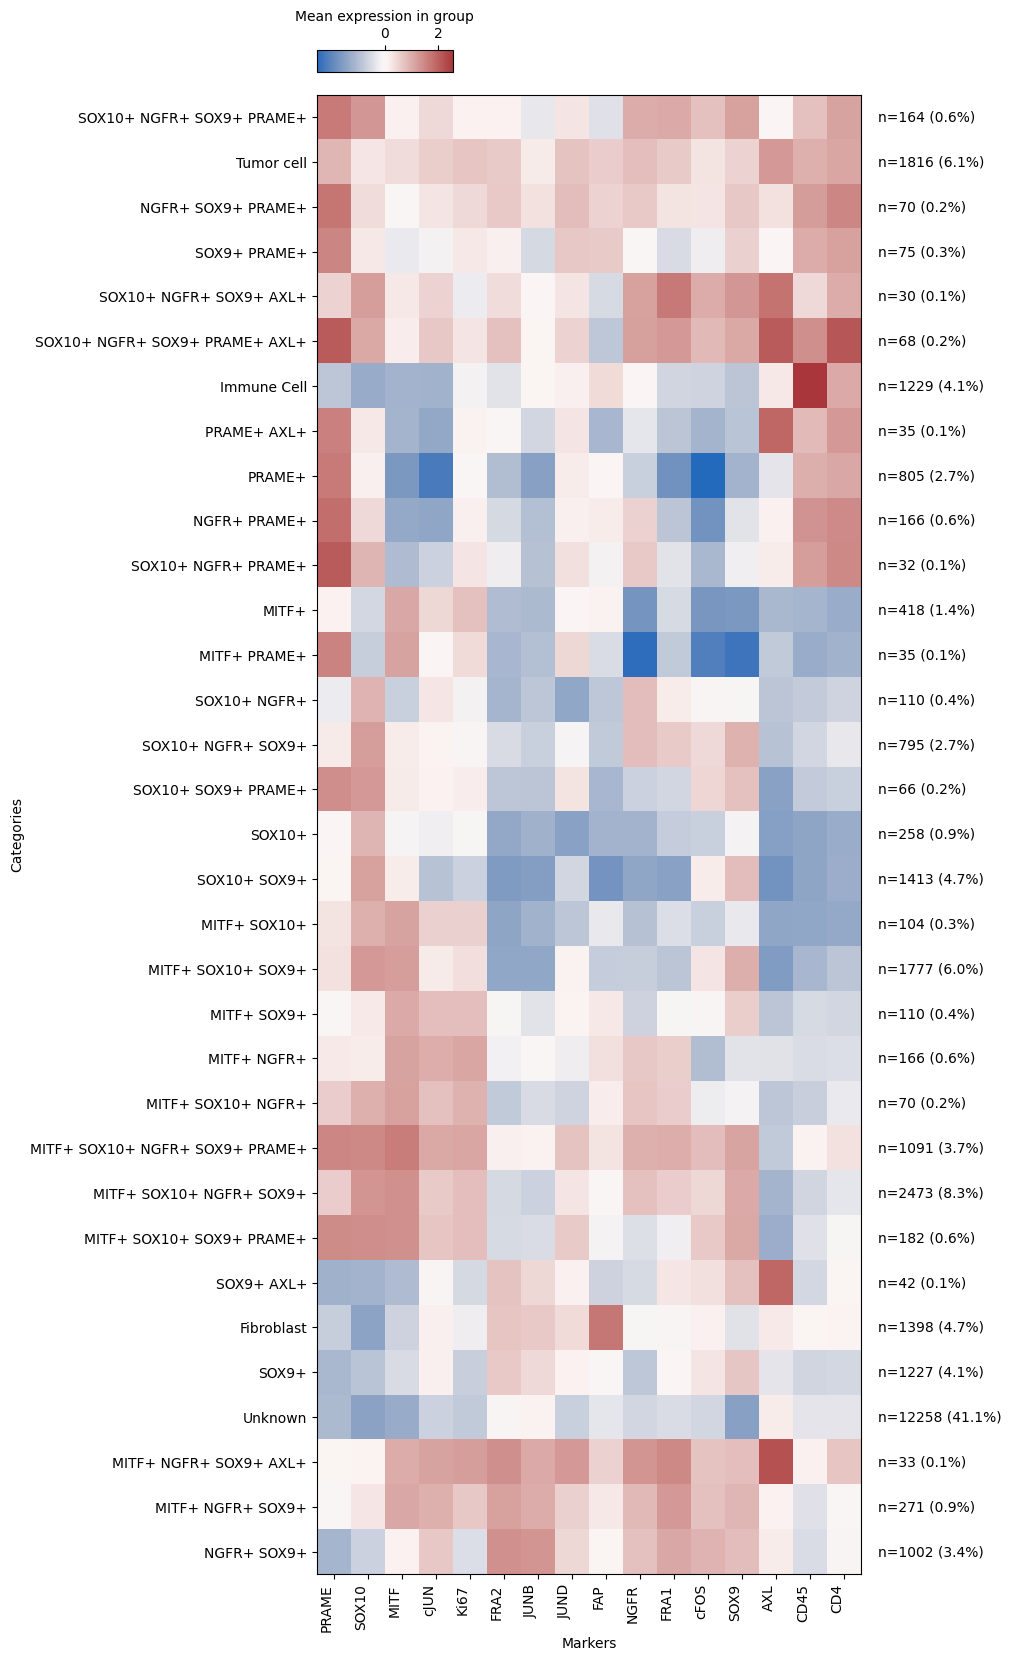

In [121]:
phenotype_subset = threshold_phenotype_by_prevalence(adata, threshold=0.001)
markers = ['PRAME', 'MITF', 'JUND', 'SOX10', 'cJUN', 'cFOS', 'NGFR', 'Ki67', 'AXL', 'CD45', 'FAP', 'FRA1', 'SOX9', 'FRA2', 'CD4', 'JUNB']
heatmap(adata,groupBy='phenotype',layer='zscore', showPrevalence=True,subsetGroups=phenotype_subset, subsetMarkers=markers)

In [66]:
# Apply the categorize_phenotype function to create a new column in adata.obs
adata.obs['phenotype_category'] = adata.obs['phenotype'].apply(categorize_phenotype)
# Display the updated adata.obs
adata.obs.head()

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid,ROI,phenotype,phenotype_category
Case2-7_feature-extraction_1,7757.700000,16.225000,40.0,7.861394,6.476765,0.566779,0.975610,0.714286,-1.212495,1,Case2-7_feature-extraction,Other,MITF+ SOX10+ NGFR+ PRAME+,Tumor
Case2-7_feature-extraction_2,8232.495575,202.619469,113.0,19.467980,7.508642,0.922628,0.904000,0.627778,-1.250069,2,Case2-7_feature-extraction,Other,Unknown,Other
Case2-7_feature-extraction_3,8197.819820,210.342342,111.0,17.394115,8.710855,0.865567,0.840909,0.566327,-0.776306,3,Case2-7_feature-extraction,Other,Fibroblast,TME
Case2-7_feature-extraction_4,8223.294118,209.294118,17.0,5.224377,4.122686,0.614233,0.894737,0.680000,-0.785398,4,Case2-7_feature-extraction,Other,Fibroblast,TME
Case2-7_feature-extraction_5,8227.717949,212.384615,39.0,11.987919,4.743020,0.918401,0.847826,0.487500,-0.610360,5,Case2-7_feature-extraction,Other,MITF+ SOX10+ NGFR+ SOX9+,Tumor


In [443]:
#write adata to a file
adata.write(project_dir + 'Case3-7_NGFR_SOX9updated_2ROIs.h5ad')

In [174]:
adata = ad.read_h5ad(project_dir + 'Case3-7_ROI.h5ad')

In [ ]:
#Create new adata object with only tumor cells
tumor_adata = adata[(adata.obs['phenotype_category'] == 'Tumor') & (adata.obs['ROI'].str.contains('Tumor', na=False, case=False))]
tumor_adata
tumor_adata.write(project_dir + 'Case2-7_ROI_tumor_adata.h5ad')

In [445]:
#tumor_adata = ad.read_h5ad(project_dir + 'Case3-7_tumor_adata.h5ad')
tumor_adata.obs.head()

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,imageid,ROI,phenotype,phenotype_category
Case3-7_feature-extraction_15387,1095.075949,683.177215,79.0,10.610537,9.830794,0.376264,0.975309,0.790000,0.473460,15387,Case3-7_feature-extraction,Tumor_Nodule1,MITF+ SOX10+ NGFR+ SOX9+ PRAME+,Tumor
Case3-7_feature-extraction_15447,1126.042254,684.380282,71.0,10.962796,8.548704,0.626038,0.972603,0.806818,-1.368492,15447,Case3-7_feature-extraction,Tumor_Nodule1,MITF+ AXL+,Tumor
Case3-7_feature-extraction_15634,1084.822785,692.949367,79.0,12.753303,7.977794,0.780186,0.951807,0.797980,-1.123238,15634,Case3-7_feature-extraction,Tumor_Nodule1,MITF+ SOX10+ SOX9+ PRAME+,Tumor
Case3-7_feature-extraction_15741,1058.915789,699.800000,95.0,14.474816,8.632859,0.802683,0.879630,0.608974,-0.529979,15741,Case3-7_feature-extraction,Tumor_Nodule1,MITF+ SOX10+ SOX9+ PRAME+,Tumor
Case3-7_feature-extraction_15764,1105.610000,700.810000,100.0,12.060420,11.013405,0.407543,0.909091,0.641026,-1.205226,15764,Case3-7_feature-extraction,Tumor_Nodule1,MITF+ SOX10+ NGFR+ SOX9+ PRAME+,Tumor


Checking pixel intensity distribution


In [446]:
tumor_adata.obs['ROI'].value_counts()

ROI
Tumor_Nodule1    141168
Tumor_Nodule2     65018
Name: count, dtype: int64

In [ ]:
###Changing a value in the a column across all rows

# Ensure "Tumor" is added to the categories of the 'phenotype' column
if 'Tumor' not in adata.obs['ROI'].cat.categories:
    adata.obs['ROI'] = adata.obs['ROI'].cat.add_categories(['Tumor'])

# Update the 'phenotype' column based on the condition
for i, r in adata.obs.iterrows():
    if r['ROI'] == "ROI":
        adata.obs.loc[i, 'ROI'] = "Tumor"

In [37]:
tumor_adata.obs['ROI'].value_counts()

ROI
Tumor    284589
Name: count, dtype: int64

In [26]:
def distPlot(
    adata,
    layer=None,
    markers=None,
    subset=None,
    imageid='imageid',
    vline=None,
    vlinewidth=None,
    plotGrid=True,
    ncols=None,
    color=None,
    xticks=None,
    figsize=(5, 5),
    fontsize=None,
    dpi=200,
    saveDir=None,
    fileName='scimapDistPlot.png',
    scale_x1=None,
    scale_x2=None,
):
    """
    Parameters:
        adata (anndata.AnnData):
            Annotated data object.

        layer (str, optional):
            Layer of data to plot.

        markers (list, optional):
            List of marker genes to plot.

        subset (list or None, optional):
            `imageid` of a single or multiple images to be subsetted for plotting purposes.

        imageid (str, optional):
            The column name in `spatial feature table` that contains the image ID
            for each cell.

        vline (float or 'auto', optional):
            The x-coordinate of the vertical line to plot. If set to `None`, a vertical line is not plotted.
            Use 'auto' to draw a vline at the center point.

        plotGrid (bool, optional):
            Whether to plot each marker in it's own sub plot. If `False` and multiple markers
            are passed in via `markers`, all distributions will be plotted within a single plot.

        ncols (int, optional):
            The number of columns in the final plot when multiple variables are plotted.

        color (str, optional):
            Color of the distribution plot.

        xticks (list of float, optional):
            Custom x-axis tick values.

        figsize (tuple, optional):
            Figure size. Defaults to (5, 5).

        fontsize (int, optional):
            The size of the font of the axis labels.

        dpi (int, optional):
            The DPI of the figure. Use this to control the point size. Lower the dpi, larger the point size.

        saveDir (str, optional):
            The directory to save the output plot.

        fileName (str, optional):
            The name of the output file. Use desired file format as suffix (e.g. `.png` or `.pdf`).

    Returns:
        Plot (image):
            If `outputDir` is provided the plot will saved within the provided outputDir.

    Example:
            ```python

            sm.pl.distPlot(adata,
                         layer=None,
                         markers=['CD45','CD3D','CD20'],
                         plotGrid=True,
                         ncols=5)
            ```

    """

    # testing
    # layers=None; markers=None; plotGrid=True; ncols=None; color=None; figsize=(10, 10); fontsize=None; subset=None; imageid='imageid'; xticks=None; dpi=200; outputDir=None;
    # outputFileName='distPlot.png'
    # color = {'markerA': '#000000', 'markerB': '#FF0000'}
    # outputDir = r"C:\Users\aj\Downloads"

    # subset data if neede
    if subset is not None:
        if isinstance(subset, str):
            subset = [subset]
        if layer == 'raw':
            bdata = adata.copy()
            bdata.X = adata.raw.X
            bdata = bdata[bdata.obs[imageid].isin(subset)]
        else:
            bdata = adata.copy()
            bdata = bdata[bdata.obs[imageid].isin(subset)]
    else:
        bdata = adata.copy()

    # isolate the data
    if layer is None:
        data = pd.DataFrame(bdata.X, index=bdata.obs.index, columns=bdata.var.index)
    elif layer == 'raw':
        data = pd.DataFrame(bdata.raw.X, index=bdata.obs.index, columns=bdata.var.index)
    else:
        data = pd.DataFrame(
            bdata.layers[layer], index=bdata.obs.index, columns=bdata.var.index
        )

    # keep only columns that are required
    if markers is not None:
        if isinstance(markers, str):
            markers = [markers]
        # subset the list
        data = data[markers]

    # auto identify rows and columns in the grid plot
    def calculate_grid_dimensions(num_items, num_columns=None):
        """
        Calculates the number of rows and columns for a square grid
        based on the number of items.
        """
        if num_columns is None:
            num_rows_columns = int(math.ceil(math.sqrt(num_items)))
            return num_rows_columns, num_rows_columns
        else:
            num_rows = int(math.ceil(num_items / num_columns))
            return num_rows, num_columns

    if plotGrid is False:
        # Create a figure and axis object
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
        # Loop through each column in the DataFrame and plot a KDE with the
        # user-defined color or the default color (grey)
        if color is None:
            for column in data.columns:
                data[column].plot.kde(ax=ax, label=column)
        else:
            for column in data.columns:
                c = color.get(column, 'grey')
                data[column].plot.kde(ax=ax, label=column, color=c)
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=fontsize)
        ax.tick_params(axis='both', which='major', width=1, labelsize=fontsize)
        plt.tight_layout()
        if xticks is not None:
            ax.set_xticks(xticks)
            ax.set_xticklabels([str(x) for x in xticks])

        if vline == 'auto':
            ax.axvline((data[column].max() + data[column].min()) / 2, color='black')
        elif vline is None:
            pass
        else:
            ax.axvline(vline, color='black')
            
        if scale_x:
            ax.set_xlim(data.min().min(), data.max().max())

        # save figure
        if outputDir is not None:
            plt.savefig(pathlib.Path(outputDir) / outputFileName)

    else:
        # calculate the number of rows and columns
        num_rows, num_cols = calculate_grid_dimensions(
            len(data.columns), num_columns=ncols
        )

        # set colors
        if color is None:
            # Define a color cycle of 10 colors
            color_cycle = itertools.cycle(
                plt.rcParams['axes.prop_cycle'].by_key()['color']
            )
            # Assign a different color to each column
            color = {col: next(color_cycle) for col in data.columns}

        # Set the size of the figure
        fig, axes = plt.subplots(
            nrows=num_rows, ncols=num_cols, figsize=figsize, dpi=dpi
        )
        axes = np.atleast_2d(axes)
        # Set the spacing between subplots
        # fig.subplots_adjust(bottom=0.1, hspace=0.1)

        # Loop through each column in the DataFrame and plot a KDE with the
        # user-defined color or the default color (grey) in the corresponding subplot
        for i, column in enumerate(data.columns):
            c = color.get(column, 'grey')
            row_idx = i // num_cols
            col_idx = i % num_cols
            data[column].plot.kde(ax=axes[row_idx, col_idx], label=column, color=c)
            axes[row_idx, col_idx].set_title(column)
            axes[row_idx, col_idx].tick_params(
                axis='both', which='major', width=1, labelsize=fontsize
            )
            axes[row_idx, col_idx].set_ylabel('')

            if vline == 'auto':
                axes[row_idx, col_idx].axvline(
                    (data[column].max() + data[column].min()) / 2, color='gray', dashes=[2, 2], linewidth=1
                )
                if vlinewidth is not None:
                    axes[row_idx, col_idx].axvline(
                        (data[column].max() + data[column].min()) / 2,color='gray', dashes=[2, 2], linewidth=vlinewidth)
            elif vline is None:
                pass
            else:
                axes[row_idx, col_idx].axvline(vline, color='black')

            if xticks is not None:
                axes[row_idx, col_idx].set_xticks(xticks)
                axes[row_idx, col_idx].set_xticklabels([str(x) for x in xticks])
                
            if scale_x1 and scale_x2 is not None:
                axes[row_idx, col_idx].set_xlim(scale_x1, scale_x2)
            else:    
                axes[row_idx, col_idx].set_xlim(data[column].min(), data[column].max())
                

        # Remove any empty subplots
        num_plots = len(data.columns)
        for i in range(num_plots, num_rows * num_cols):
            row_idx = i // num_cols
            col_idx = i % num_cols
            fig.delaxes(axes[row_idx, col_idx])

        # Set font size for tick labels on both axes
        plt.tick_params(axis='both', labelsize=fontsize)
        plt.tight_layout()

        # Save the figure to a file
        if saveDir:
            if not os.path.exists(saveDir):
                os.makedirs(saveDir)
            full_path = os.path.join(saveDir, fileName)
            plt.savefig(full_path, dpi=300)
            plt.close()
            print(f"Saved heatmap to {full_path}")
        else:
            plt.show()

In [68]:
distPlot(tumor_adata, markers = AP1s, layer='zscore',figsize=(6,6),ncols=2,fileName='Case2-7_tumor_DistPlot_AP1.png', saveDir=project_dir, fontsize=16,scale_x1=-3,scale_x2=3)

Saved heatmap to /Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/feature_extraction_all/Case2-7/Case2-7_tumor_DistPlot_AP1.png


In [69]:
distPlot(tumor_adata, markers = Diff_state_markers, layer='zscore',figsize=(6,6),ncols=2,fileName='Case2-7_tumor_DistPlot_diffstate.png', saveDir=project_dir, fontsize=16,scale_x1=-3,scale_x2=3)

Saved heatmap to /Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/feature_extraction_all/Case2-7/Case2-7_tumor_DistPlot_diffstate.png


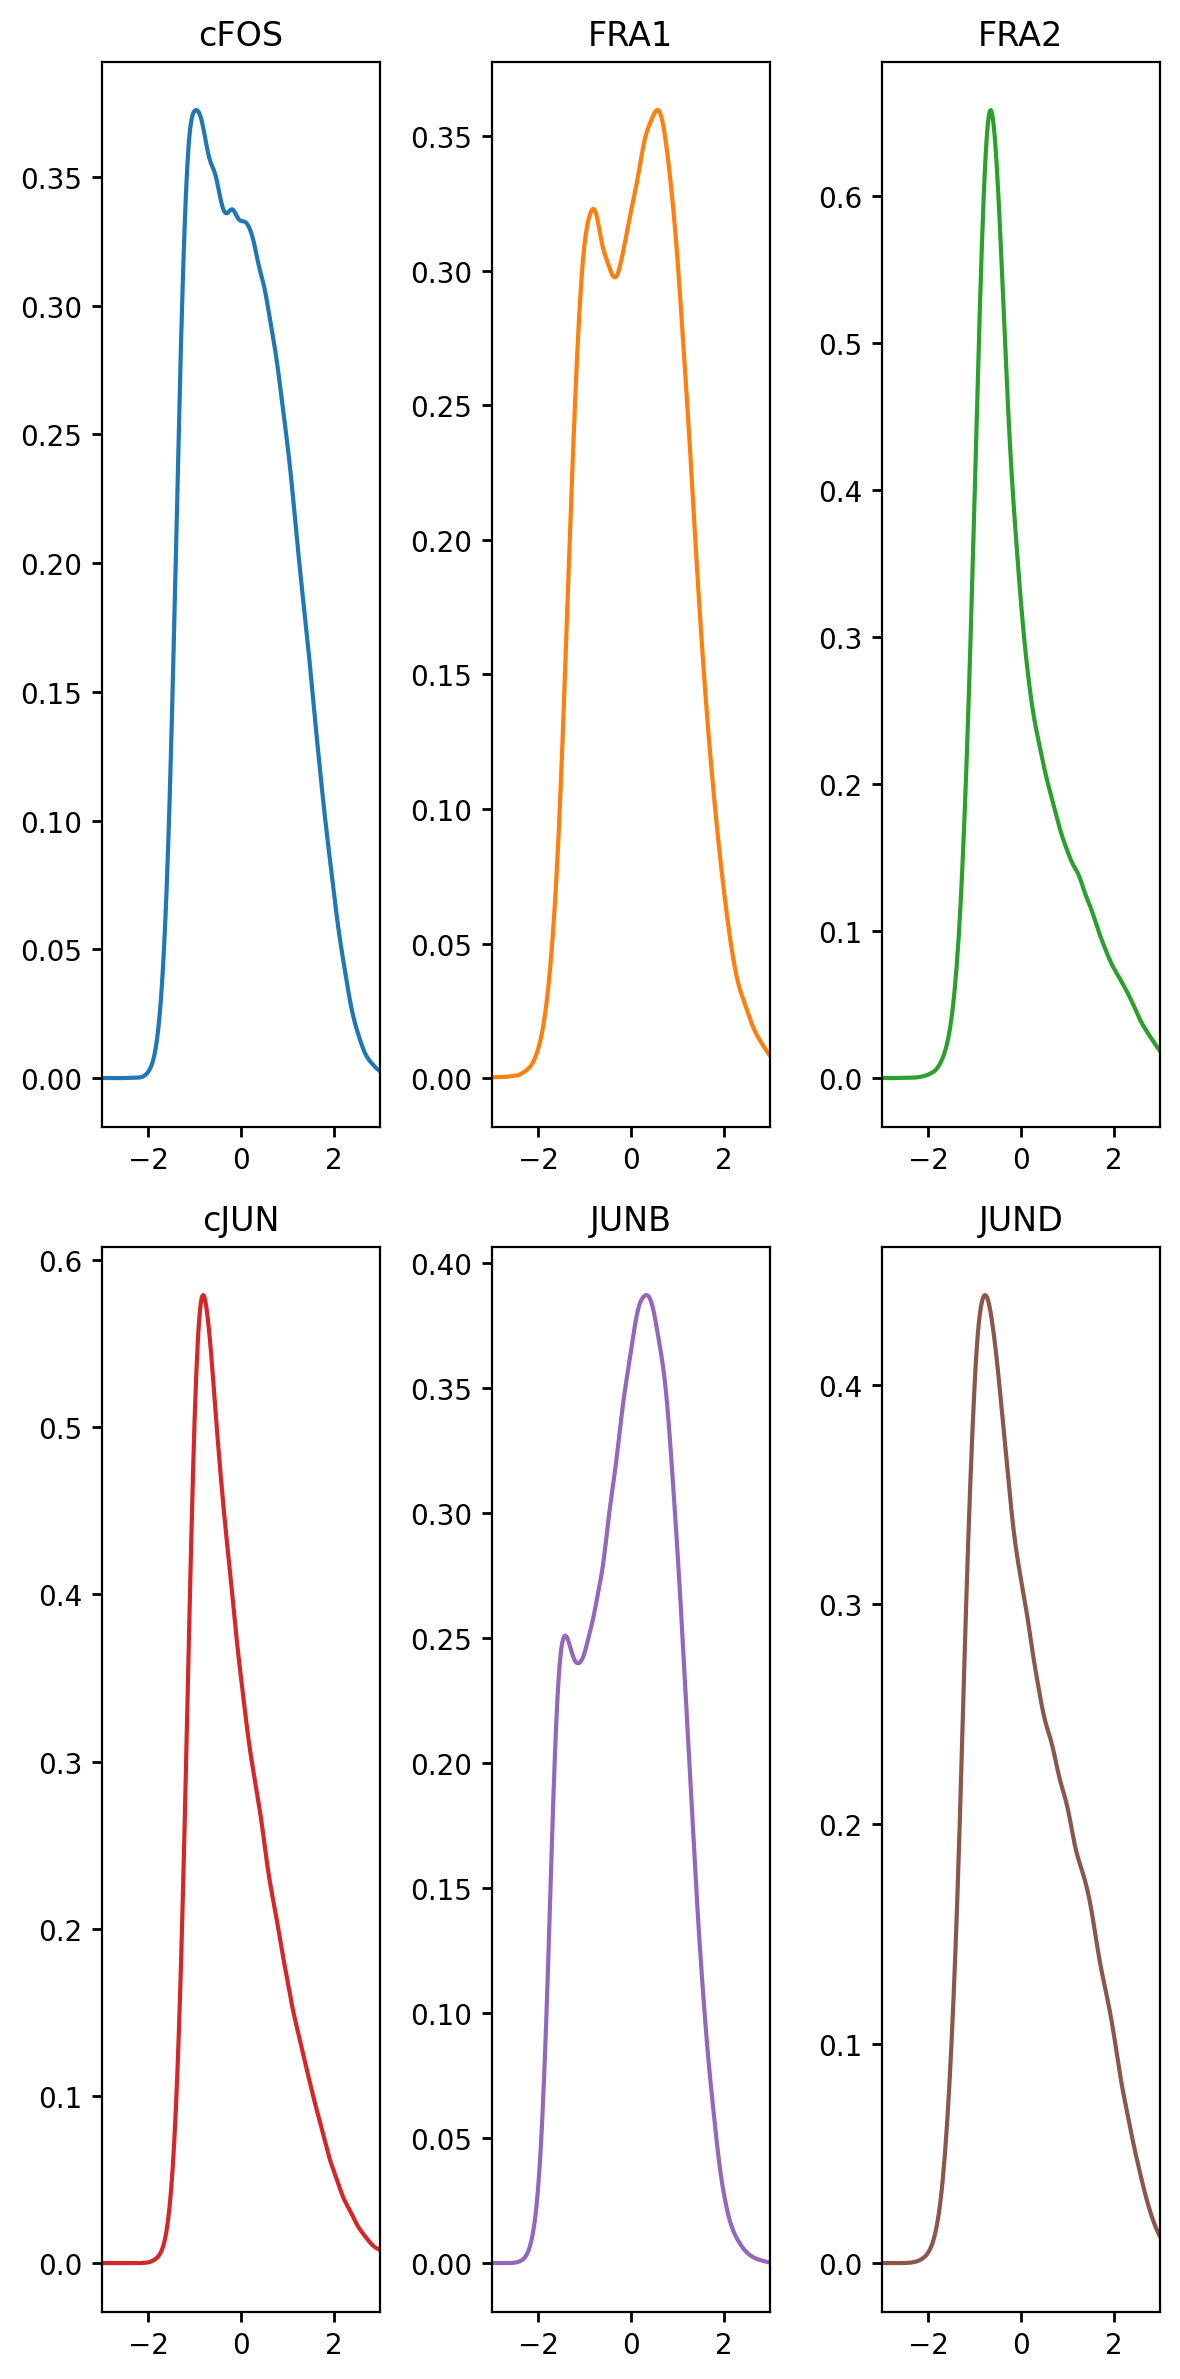

In [473]:
distPlot(tumor_adata, layer='zscore', markers=AP1s,figsize=(6,12),ncols=3, fontsize=10, scale_x1=-3,scale_x2=3)

In [ ]:
distPlot(adata, layer='log1p_raw',figsize=(6,12),ncols=3, fontsize=20)

In [116]:
adata=ad.read_h5ad("Case3-7_rescaled.h5ad")



Napari gater to phenotype cells. Rescaling only to apply phenotyping hierarchy, but will work with raw data moving forward


In [ ]:
adata= sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype"]) 

KeyError: 'gates'

In [31]:
# Add a new column for phenotype categories
def categorize_phenotype(phenotype):
    if any(marker in phenotype for marker in ['MITF', 'SOX10', 'NGFR', 'PRAME', 'SOX9', 'AXL']):
        return 'Tumor'
    elif any(cell_type in phenotype for cell_type in ['Immune Cell', 'Fibroblast', 'Endothelial Cell']):
        return 'TME'
    else:
        return 'Other'


In [188]:
counts = tumor_adata.obs['phenotype'].value_counts()
count_df = counts.to_frame()
count_df['category'] = count_df.index.map(categorize_phenotype)
count_df

,count,category
phenotype,,
MITF+ SOX10+ SOX9+ PRAME+,61960,Tumor
MITF+ SOX10+ NGFR+ SOX9+ PRAME+,33231,Tumor
MITF+ SOX10+ PRAME+,32757,Tumor
MITF+ SOX10+ NGFR+ PRAME+,19341,Tumor
MITF+,8962,Tumor
MITF+ PRAME+,8813,Tumor
SOX10+ PRAME+,8168,Tumor
MITF+ NGFR+,7932,Tumor
SOX10+,6993,Tumor


In [29]:
def threshold_phenotype_by_prevalence(adata, threshold= 0.01):
    counts = adata.obs['phenotype'].value_counts()
    count_df = counts.to_frame()  
    total_count = count_df['count'].sum()
    subset_count_df = count_df[count_df['count'] > total_count * threshold]
    phenotypes_above_prevalence_threshold = subset_count_df.index.tolist()
    phenotypes_above_prevalence_threshold 
    print(subset_count_df)
    print("total count:" + str(total_count))
    return phenotypes_above_prevalence_threshold

In [195]:
threshold_phenotype_by_prevalence(tumor_adata, threshold=0.01)

                                 count
phenotype                             
MITF+ SOX10+ SOX9+ PRAME+        61960
MITF+ SOX10+ NGFR+ SOX9+ PRAME+  33231
MITF+ SOX10+ PRAME+              32757
MITF+ SOX10+ NGFR+ PRAME+        19341
MITF+                             8962
MITF+ PRAME+                      8813
SOX10+ PRAME+                     8168
MITF+ NGFR+                       7932
SOX10+                            6993
MITF+ SOX10+                      6835
MITF+ SOX10+ NGFR+                6210
MITF+ SOX10+ SOX9+                4879
MITF+ NGFR+ PRAME+                4602
SOX10+ SOX9+ PRAME+               4247
PRAME+                            3107
SOX10+ SOX9+                      2809
SOX10+ NGFR+                      2750
SOX10+ NGFR+ PRAME+               2676
MITF+ SOX10+ NGFR+ SOX9+          2622
SOX10+ NGFR+ SOX9+ PRAME+         2548
total count:248088


['MITF+ SOX10+ SOX9+ PRAME+',
 'MITF+ SOX10+ NGFR+ SOX9+ PRAME+',
 'MITF+ SOX10+ PRAME+',
 'MITF+ SOX10+ NGFR+ PRAME+',
 'MITF+',
 'MITF+ PRAME+',
 'SOX10+ PRAME+',
 'MITF+ NGFR+',
 'SOX10+',
 'MITF+ SOX10+',
 'MITF+ SOX10+ NGFR+',
 'MITF+ SOX10+ SOX9+',
 'MITF+ NGFR+ PRAME+',
 'SOX10+ SOX9+ PRAME+',
 'PRAME+',
 'SOX10+ SOX9+',
 'SOX10+ NGFR+',
 'SOX10+ NGFR+ PRAME+',
 'MITF+ SOX10+ NGFR+ SOX9+',
 'SOX10+ NGFR+ SOX9+ PRAME+']

In [56]:
all_combinations=['MITF+ SOX10+', 'MITF+ NGFR+', 'MITF+ SOX9+', 'MITF+ PRAME+', 'MITF+ AXL+', 'SOX10+ NGFR+', 'SOX10+ SOX9+', 'SOX10+ PRAME+', 'SOX10+ AXL+', 'NGFR+ SOX9+', 'NGFR+ PRAME+', 'NGFR+ AXL+', 'SOX9+ PRAME+', 'SOX9+ AXL+', 'PRAME+ AXL+', 'MITF+ SOX10+ NGFR+', 'MITF+ SOX10+ SOX9+', 'MITF+ SOX10+ PRAME+', 'MITF+ SOX10+ AXL+', 'MITF+ NGFR+ SOX9+', 'MITF+ NGFR+ PRAME+', 'MITF+ NGFR+ AXL+', 'MITF+ SOX9+ PRAME+', 'MITF+ SOX9+ AXL+', 'MITF+ PRAME+ AXL+', 'SOX10+ NGFR+ SOX9+', 'SOX10+ NGFR+ PRAME+', 'SOX10+ NGFR+ AXL+', 'SOX10+ SOX9+ PRAME+', 'SOX10+ SOX9+ AXL+', 'SOX10+ PRAME+ AXL+', 'NGFR+ SOX9+ PRAME+', 'NGFR+ SOX9+ AXL+', 'NGFR+ PRAME+ AXL+', 'SOX9+ PRAME+ AXL+', 'MITF+ SOX10+ NGFR+ SOX9+', 'MITF+ SOX10+ NGFR+ PRAME+', 'MITF+ SOX10+ NGFR+ AXL+', 'MITF+ SOX10+ SOX9+ PRAME+', 'MITF+ SOX10+ SOX9+ AXL+', 'MITF+ SOX10+ PRAME+ AXL+', 'MITF+ NGFR+ SOX9+ PRAME+', 'MITF+ NGFR+ SOX9+ AXL+', 'MITF+ NGFR+ PRAME+ AXL+', 'MITF+ SOX9+ PRAME+ AXL+', 'SOX10+ NGFR+ SOX9+ PRAME+', 'SOX10+ NGFR+ SOX9+ AXL+', 'SOX10+ NGFR+ PRAME+ AXL+', 'SOX10+ SOX9+ PRAME+ AXL+', 'NGFR+ SOX9+ PRAME+ AXL+', 'MITF+', 'SOX10+', 'NGFR+', 'SOX9+', 'PRAME+', 'AXL+', 'MITF+ SOX10+ NGFR+ SOX9+ PRAME+', 'MITF+ SOX10+ NGFR+ SOX9+ AXL+', 'MITF+ SOX10+ NGFR+ PRAME+ AXL+', 'MITF+ SOX10+ SOX9+ PRAME+ AXL+', 'MITF+ NGFR+ SOX9+ PRAME+ AXL+', 'SOX10+ NGFR+ SOX9+ PRAME+ AXL+', 'MITF+ SOX10+ NGFR+ SOX9+ PRAME+ AXL+']

In [27]:
def heatmap(
    adata,
    groupBy,
    layer=None,
    subsetMarkers=None,
    subsetGroups=None,
    clusterRows=True,
    clusterColumns=True,
    standardScale=None,
    orderRow=None,
    orderColumn=None,
    showPrevalence=False,
    cmap='vlag',
    figsize=None,
    saveDir=None,
    fileName=None,
    verbose=True,
    scale_title=None,
    **kwargs,
):
    """

    Parameters:
        adata (AnnData):
            An AnnData object or `path` to an Anndata object containing the dataset to be visualized. It should have features as variables and observations as rows.

        groupBy (str):
            The key in `adata.obs` on which to group observations. Typically, this will be a clustering pr phenotype label like 'leiden' or 'phenotype'.

        layer (str, optional):
            Specifies the layer of `adata` to use for the heatmap. If None, the `.X` attribute is used. If you want to plot the raw data use `raw`

        subsetMarkers (list of str, optional):
            A list of marker genes or features to include in the heatmap. If None, all markers are used.

        subsetGroups (list of str, optional):
            A list of group labels to include in the heatmap. Useful for focusing on specific clusters or conditions.

        clusterRows (bool):
            Whether to cluster rows (observations).

        clusterColumns (bool):
            Whether to cluster columns (features).

        standardScale (str, optional):
            Determines if and how to normalize the data across rows or columns. Acceptable values are 'row', 'column', or None.

        orderRow (list of str, optional):
            Specifies a custom order for the rows based on group labels.

        orderColumn (list of str, optional):
            Specifies a custom order for the columns based on feature names.

        showPrevalence (bool):
            If True, adds a bar showing the prevalence of the feature across the groups.

        cmap (str):
            The colormap for the heatmap.

        figsize (tuple of float, optional):
            The size of the figure to create. If None, the size is inferred.

        saveDir (str, optional):
            Directory to save the generated heatmap. If None, the heatmap is not saved.

        fileName (str, optional):
            Name of the file to save the heatmap. Relevant only if `saveDir` is not None.

        verbose (bool):
            If True, print additional information during execution.

        **kwargs:
            Additional keyword arguments are passed to the underlying matplotlib plotting function.

    Returns:
        plot (matplotlib):
            Returns a plot, if `saveDir` and `fileName` are provided, the plot is saved in the given directory.

    Example:
            ```python

            # Example 1: Basic usage with clustering and standard scale by column.

            sm.pl.heatmap(adata, groupBy='leiden', standardScale='column')

            # Example 2: Advanced usage with specified subset markers, custom grouping, and file saving.

            subsetMarkers = ['ELANE', 'CD57', 'CD45', 'CD11B', 'SMA', 'CD16', 'ECAD']
            subsetGroups = ['0', '1', '3', '6']
            orderRow = ['6', '3', '0', '1']
            orderColumn = ['SMA', 'CD16', 'ECAD', 'ELANE', 'CD57', 'CD45', 'CD11B']
            saveDir = '/path/to/save'
            fileName = 'custom_heatmap.pdf'

            sm.pl.heatmap(adata, groupBy='leiden', subsetMarkers=subsetMarkers, subsetGroups=subsetGroups, clusterRows=False, clusterColumns=False, standardScale='column', orderRow=orderRow, orderColumn=orderColumn, showPrevalence=True, figsize=(10, 5), saveDir=saveDir, fileName=fileName, vmin=0, vmax=1)

            ```
    """

    # load adata
    if isinstance(adata, str):
        adata = ad.read_h5ad(adata)

    # check if the location is provided if the user wishes to save the image
    if (saveDir is None and fileName is not None) or (
        saveDir is not None and fileName is None
    ):
        raise ValueError(
            "Both 'saveDir' and 'fileName' must be provided together or not at all."
        )

    # subset data if user requests
    subsetadata = None  # intialize subsetted data
    if subsetGroups:
        subsetGroups = (
            [subsetGroups] if isinstance(subsetGroups, str) else subsetGroups
        )  # convert to list
        subsetadata = adata[adata.obs[groupBy].isin(subsetGroups)]
        # also identify the categories to be plotted
        categories = subsetadata.obs[groupBy].values
    else:
        # also identify the categories to be plotted
        categories = adata.obs[groupBy].values

    # subset the markers if user requests
    if subsetMarkers:
        subsetMarkers = (
            [subsetMarkers] if isinstance(subsetMarkers, str) else subsetMarkers
        )  # convert to list
        if subsetadata:
            # isolate the data
            if layer == 'raw':
                data = subsetadata[:, subsetMarkers].raw.X
            elif layer is None:
                data = subsetadata[:, subsetMarkers].X
            else:
                data = subsetadata[:, subsetMarkers].layers[layer]
        else:
            # isolate the data
            if layer == 'raw':
                data = adata[:, subsetMarkers].raw.X
            elif layer is None:
                data = adata[:, subsetMarkers].X
            else:
                data = adata[:, subsetMarkers].layers[layer]
    else:
        # take the whole data if the user does not subset anything
        if layer == 'raw':
            data = adata.raw.X
        elif layer is None:
            data = adata.X
        else:
            data = adata.layers[layer]

    # intialize the markers to be plotted
    if subsetMarkers is None:
        subsetMarkers = adata.var.index.tolist()

    # The actual plotting function
    def plot_category_heatmap_vectorized(
        data,
        marker_names,
        categories,
        clusterRows,
        clusterColumns,
        standardScale,
        orderRow,
        orderColumn,
        showPrevalence,
        cmap,
        figsize,
        saveDir,
        fileName,
        **kwargs,
    ):
        # Validate clustering and ordering options
        if (clusterRows or clusterColumns) and (
            orderRow is not None or orderColumn is not None
        ):
            raise ValueError(
                "Cannot use clustering and manual ordering together. Please choose one or the other."
            )

        if standardScale not in [None, 'row', 'column']:
            raise ValueError("standardScale must be 'row', 'column', or None.")

        # Convert marker_names to list if it's a pandas Index
        # if isinstance(marker_names, pd.Index):
        #    marker_names = marker_names.tolist()

        # Data preprocessing
        sorted_indices = np.argsort(categories)
        data = data[sorted_indices, :]
        categories = categories[sorted_indices]
        unique_categories, category_counts = np.unique(categories, return_counts=True)

        # Compute mean values for each category
        mean_data = np.array(
            [
                np.mean(data[categories == category, :], axis=0)
                for category in unique_categories
            ]
        )

        # Apply standard scaling if specified
        if standardScale == 'row':
            scaler = StandardScaler()
            mean_data = scaler.fit_transform(mean_data)
        elif standardScale == 'column':
            scaler = StandardScaler()
            mean_data = scaler.fit_transform(mean_data.T).T

        # Apply manual ordering if specified
        if orderRow:
            # Ensure orderRow is a list
            if isinstance(orderRow, pd.Index):
                orderRow = orderRow.tolist()
            row_order = [unique_categories.tolist().index(r) for r in orderRow]
            mean_data = mean_data[row_order, :]
            unique_categories = [unique_categories[i] for i in row_order]
            category_counts = [category_counts[i] for i in row_order]

        if orderColumn:
            # Ensure orderColumn is a list0000
            if isinstance(orderColumn, pd.Index):
                orderColumn = orderColumn.tolist()
            col_order = [marker_names.index(c) for c in orderColumn]
            mean_data = mean_data[:, col_order]
            marker_names = [marker_names[i] for i in col_order]

            # Clustering
        if clusterRows:
            # Perform hierarchical clustering
            row_linkage = linkage(pdist(mean_data), method='average')
            # Reorder data according to the clustering
            row_order = dendrogram(row_linkage, no_plot=True)['leaves']
            mean_data = mean_data[row_order, :]
            unique_categories = unique_categories[row_order]
            category_counts = category_counts[row_order]

        if clusterColumns:
            # Perform hierarchical clustering
            col_linkage = linkage(pdist(mean_data.T), method='average')
            # Reorder data according to the clustering
            col_order = dendrogram(col_linkage, no_plot=True)['leaves']
            mean_data = mean_data[:, col_order]
            marker_names = [marker_names[i] for i in col_order]

        # Plotting
        # Dynamic figsize calculation
        if figsize is None:
            base_size = 0.5  # Base size for each cell in inches
            figsize_width = max(10, len(marker_names) * base_size)
            figsize_height = max(8, len(unique_categories) * base_size)
            figsize = (figsize_width, figsize_height)

        fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)

        # Heatmap
        # Extract vmin and vmax from kwargs if present, else default to min and max of mean_data
        vmin = kwargs.pop('vmin', np.min(mean_data))
        vmax = kwargs.pop('vmax', np.max(mean_data))

        # Create the Normalize instance with vmin and vmax
        norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

        c = ax.imshow(mean_data, aspect='auto', cmap=cmap, norm=norm, **kwargs)

        # Prevalence text
        if showPrevalence:
            # Calculate text offset from the last column of the heatmap
            text_offset = (
                mean_data.shape[1] * 0.001
            )  # Small offset from the right edge of the heatmap
            total_cells = sum(category_counts)

            for index, count in enumerate(category_counts):
                percentage = (count / total_cells) * 100
                # Position text immediately to the right of the heatmap
                ax.text(
                    mean_data.shape[1] + text_offset,
                    index,
                    f"n={count} ({percentage:.1f}%)",
                    va='center',
                    ha='left',
                )

        # Setting the tick labels
        ax.set_xticks(np.arange(mean_data.shape[1]))
        ax.set_xticklabels(marker_names, rotation=90, ha="right")
        ax.set_yticks(np.arange(mean_data.shape[0]))
        ax.set_yticklabels(unique_categories)

        # Move the colorbar to the top left corner
        # cbar_ax = fig.add_axes([0.125, 0.92, 0.2, 0.02])  # x, y, width, height
        cbar_ax = ax.inset_axes([-0.5, -1.5, 4, 0.5], transform=ax.transData)
        cbar = plt.colorbar(c, cax=cbar_ax, orientation='horizontal')
        cbar_ax.xaxis.set_ticks_position('top')
        cbar_ax.xaxis.set_label_position('top')
        if scale_title:
            cbar.set_label(scale_title)
        else:
            cbar.set_label('Mean expression in group')

        ax.set_xlabel('Markers')
        ax.set_ylabel('Categories')

        # plt.tight_layout(rect=[0, 0, 0.9, 0.9]) # Adjust the layout

        # Saving the figure if saveDir and fileName are provided
        if saveDir:
            if not os.path.exists(saveDir):
                os.makedirs(saveDir)
            full_path = os.path.join(saveDir, fileName)
            plt.savefig(full_path, dpi=300)
            plt.close(fig)
            print(f"Saved heatmap to {full_path}")
        else:
            plt.show()

    # call the plotting function
    plot_category_heatmap_vectorized(
        data=data,
        marker_names=subsetMarkers,
        categories=categories,
        clusterRows=clusterRows,
        clusterColumns=clusterColumns,
        standardScale=standardScale,
        orderRow=orderRow,
        orderColumn=orderColumn,
        showPrevalence=showPrevalence,
        cmap=cmap,
        figsize=figsize,
        saveDir=saveDir,
        fileName=fileName,
        **kwargs,
    )

In [202]:
# Calculate the standard deviation of the zscore layer for each variable
zscore_std = tumor_adata.layers["zscore"].std(axis=0)

# Convert to a pandas DataFrame for better readability
zscore_stats_df = pd.DataFrame({
    "mean_zscore": tumor_adata.layers["zscore"].mean(axis=0),
    "std_zscore": zscore_std
}, index=tumor_adata.var.index)

# Display the result
print(zscore_stats_df)

          mean_zscore  std_zscore
Hoechst -4.017159e-13         1.0
PRAME   -1.322184e-14         1.0
MITF    -2.821570e-14         1.0
JUND    -9.757981e-15         1.0
SOX10    1.245519e-15         1.0
cJUN     2.981278e-14         1.0
cFOS    -3.853043e-14         1.0
NGFR    -4.771938e-14         1.0
Ki67    -1.311561e-14         1.0
AXL     -1.028930e-14         1.0
CD45     6.023251e-14         1.0
FAP      3.599379e-14         1.0
FRA1     3.568234e-15         1.0
SOX9    -4.269574e-14         1.0
FRA2    -5.576010e-14         1.0
CD4      3.444450e-14         1.0
JUNB     5.056585e-14         1.0


In [75]:
phenotype_subset = threshold_phenotype_by_prevalence(tumor_adata, threshold=0.001)
subsetMarkers = Diff_state_markers + ['Ki67']
subsetGroups = phenotype_subset
heatmap(tumor_adata, groupBy='phenotype', layer = 'zscore', 
            standardScale=None, subsetMarkers=subsetMarkers, subsetGroups = subsetGroups,
            figsize=(8,10), showPrevalence=True, clusterColumns=True, clusterRows=True, scale_title ='z-score (log a.u.)',
            fileName='Case2-7_tumor_heatmap_diff_0.001.png', saveDir=project_dir,
              )
#vmin=-1, vmax=1,

                                 count
phenotype                             
MITF+ SOX10+ SOX9+ PRAME+        84043
SOX9+                            39856
SOX10+ SOX9+                     38602
MITF+ SOX10+ SOX9+               27905
MITF+ SOX10+ PRAME+              14157
MITF+ SOX10+                     12067
SOX10+ SOX9+ PRAME+              11659
SOX10+                           10280
MITF+                             9374
AXL+                              9026
SOX9+ AXL+                        7310
PRAME+                            2516
NGFR+                             2150
MITF+ PRAME+                      1334
MITF+ SOX9+                       1297
NGFR+ AXL+                        1247
SOX10+ NGFR+ SOX9+                1107
SOX9+ PRAME+                      1059
MITF+ SOX10+ SOX9+ PRAME+ AXL+     943
SOX10+ PRAME+                      937
NGFR+ SOX9+                        645
PRAME+ AXL+                        604
SOX10+ SOX9+ AXL+                  506
MITF+ SOX10+ NGFR+ SOX9+ 

                                 count
phenotype                             
MITF+ SOX10+ SOX9+ PRAME+        84043
SOX9+                            40993
SOX10+ SOX9+                     38602
MITF+ SOX10+ SOX9+               27905
MITF+ SOX10+ PRAME+              14157
MITF+ SOX10+                     12067
SOX10+ SOX9+ PRAME+              11659
SOX10+                           10280
MITF+                             9374
AXL+                              9356
SOX9+ AXL+                        7501
PRAME+                            2516
NGFR+                             2203
MITF+ PRAME+                      1334
MITF+ SOX9+                       1297
NGFR+ AXL+                        1274
SOX10+ NGFR+ SOX9+                1107
SOX9+ PRAME+                      1059
MITF+ SOX10+ SOX9+ PRAME+ AXL+     943
SOX10+ PRAME+                      937
NGFR+ SOX9+                        677
PRAME+ AXL+                        604
SOX10+ SOX9+ AXL+                  506
MITF+ SOX10+ NGFR+ SOX9+ 

ValueError: vmin, vcenter, and vmax must be in ascending order

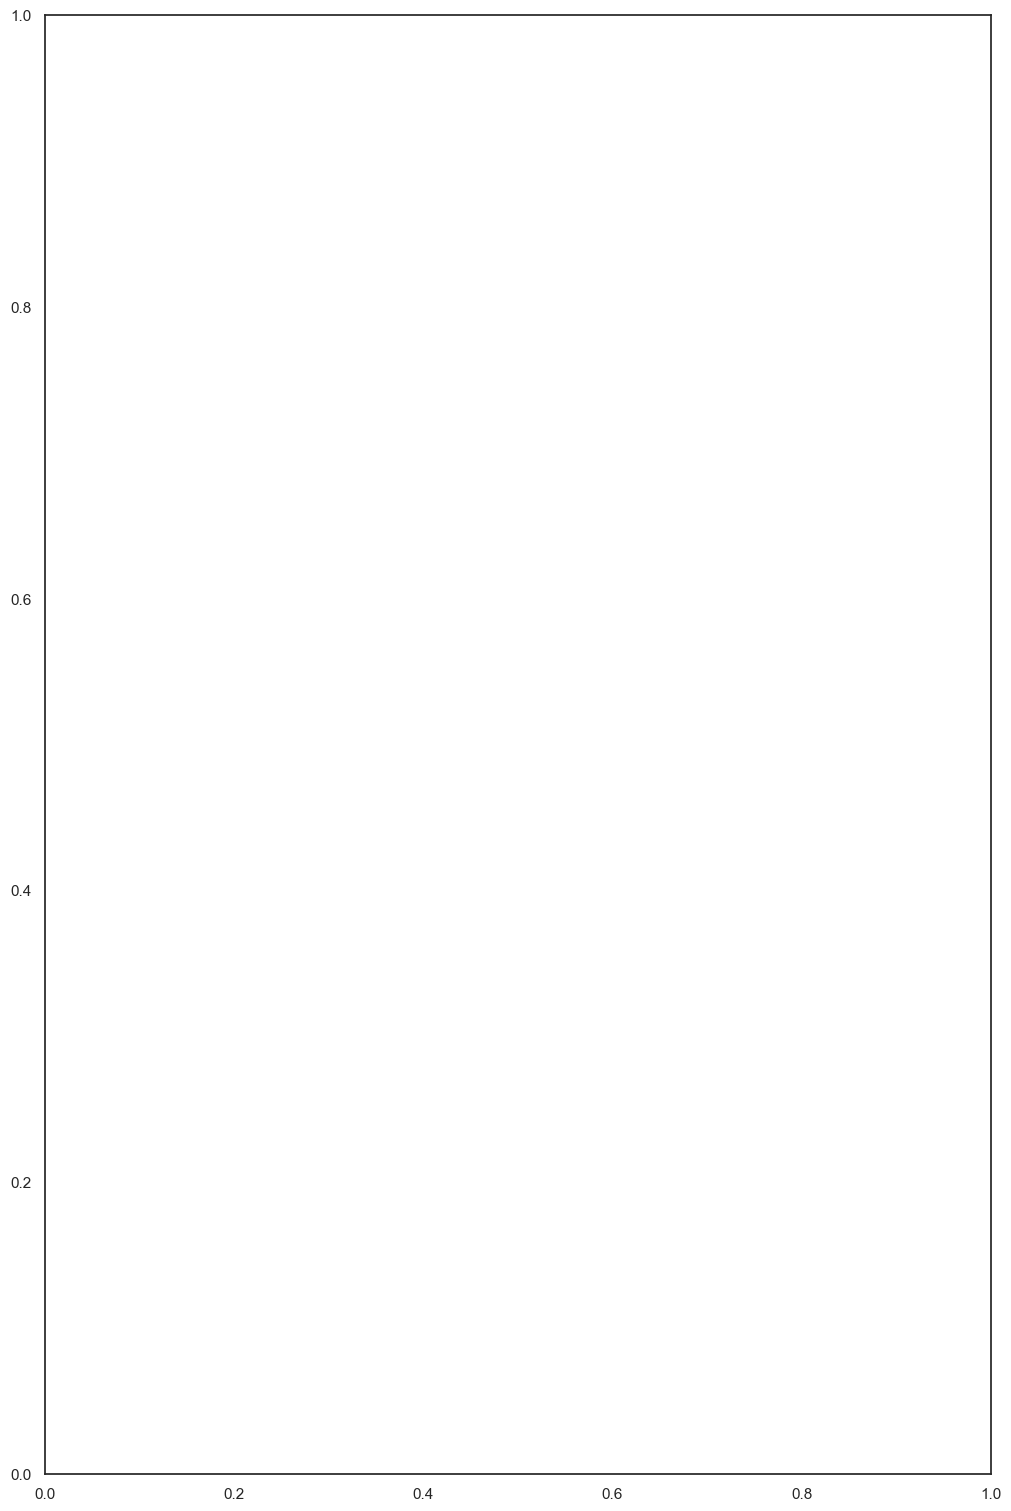

In [45]:
phenotype_subset = threshold_phenotype_by_prevalence(tumor_adata, threshold=0.001)
subsetMarkers = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND','Ki67']
subsetGroups = phenotype_subset
heatmap(tumor_adata, groupBy='phenotype', layer = 'log1p_raw' , 
            standardScale=None, subsetMarkers=subsetMarkers, subsetGroups = subsetGroups,
            figsize=(10,15), showPrevalence=True, clusterColumns=False, clusterRows=True, scale_title ='log a.u.'
              )
#vmin=-2, vmax=2,

UMAP

In [71]:
tumor_adata = sm.tl.umap(tumor_adata)

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [40]:
def umap(
    adata,
    color=None,
    layer=None,
    subset=None,
    standardScale=False,
    use_raw=False,
    log=False,
    label='umap',
    cmap='vlag',
    palette=None,
    createLegend=True,
    alpha=0.8,
    figsize=(5, 5),
    s=None,
    ncols=None,
    tight_layout=False,
    return_data=False,
    saveDir=None,
    fileName='umap.pdf',
    **kwargs,
):
    """
    Parameters:
            adata (anndata.AnnData):
                The annotated data matrix.

            color (list, optional):
                List of keys from `adata.obs.columns` or `adata.var.index` to color the plot.
                Allows multiple keys for facetted plotting.

            layer (str, optional):
                Specifies the AnnData layer to use for UMAP calculations. Defaults to using `adata.X`.

            use_raw (bool, optional):
                If True, uses `adata.raw.X` for coloring the plot, useful for visualizing gene expression on UMAP.

            log (bool, optional):
                Applies log transformation (`np.log1p`) to the data before plotting. Useful for gene expression data.

            label (str, optional):
                Key in `adata.obsm` where UMAP coordinates are stored.

            cmap (str, optional):
                Colormap for continuous variables. Supports matplotlib colormap names and objects.

            palette (dict, optional):
                Specific colors for different categories as a dictionary mapping from categories to colors.

            alpha (float, optional):
                Transparency level of the points. Ranges from 0 (transparent) to 1 (opaque).

            figsize (tuple, optional):
                Figure size specified as (width, height) in inches.

            s (int, optional):
                Size of the points in the plot.

            ncols (int, optional):
                Number of columns for facetted plotting.

            tight_layout (bool, optional):
                Adjusts subplot params for a tight layout.

            return_data (bool, optional):
                If True, returns the DataFrame containing data used for plotting instead of displaying the plot.

            saveDir (str, optional):
                Path and filename to save the figure. File extension determines the format (e.g., `.pdf`, `.png`).

            **kwargs:
                Additional keyword arguments passed to matplotlib plot function.

    Returns:
            Plot (matplotlib):
                    Optionally returns the data used for plotting if `return_data=True`.

    Example:
        ```python

        # Basic UMAP visualization with default settings
        sm.pl.umap(adata, color='cell_type')

        # UMAP visualization with log transformation and custom colormap
        sm.pl.umap(adata, color='gene_expression', log=True, cmap='coolwarm')

        # Facetted UMAP plotting with custom point size and saved figure
        sm.pl.umap(adata, color=['cell_type', 'condition'], s=100, figsize=(10, 5), save_figure='/path/to/umap_plot.png')

        ```
    """

    # check if umap tool has been run
    try:
        adata.obsm[label]
    except KeyError:
        raise KeyError("Please run `sm.tl.umap(adata)` first")



    # identify the coordinates
    umap_coordinates = pd.DataFrame(
        adata.obsm[label], index=adata.obs.index, columns=['umap-1', 'umap-2']
    )
    umap_coordinates['phenotype'] = adata.obs['phenotype']
    
    
    # other data that the user requests
    if color is not None:
        if isinstance(color, str):
            color = [color]
        # identify if all elemets of color are available
        if (
            set(color).issubset(list(adata.var.index) + list(adata.obs.columns))
            is False
        ):
            raise ValueError(
                "Element passed to `color` is not found in adata, please check!"
            )

        # organise the data
        if any(item in color for item in list(adata.obs.columns)):
            adataobs = adata.obs.loc[:, adata.obs.columns.isin(color)]
            adataobs = adataobs.apply(lambda x: x.astype('category'))

        else:
            adataobs = None

        if any(item in color for item in list(adata.var.index)):
            # find the index of the marker
            marker_index = np.where(np.isin(list(adata.var.index), color))[0]
            if layer is not None:
                adatavar = adata.layers[layer][:, np.r_[marker_index]]
            elif use_raw is True:
                adatavar = adata.raw.X[:, np.r_[marker_index]]
            else:
                adatavar = adata.X[:, np.r_[marker_index]]
            adatavar = pd.DataFrame(
                adatavar,
                index=adata.obs.index,
                columns=list(adata.var.index[marker_index]),
            )
        else:
            adatavar = None

        if standardScale is True:
            if adatavar is not None:
                adatavar = adatavar.apply(lambda x: (x - x.mean()) / x.std(), axis=0)


        # combine all color data
        if adataobs is not None and adatavar is not None:
            color_data = pd.concat([adataobs, adatavar], axis=1)
        elif adataobs is not None and adatavar is None:
            color_data = adataobs
        elif adataobs is None and adatavar is not None:
            color_data = adatavar
    else:
        color_data = None

    # combine color data with umap coordinates
    if color_data is not None:
        final_data = pd.concat([umap_coordinates, color_data], axis=1)
    else:
        final_data = umap_coordinates

    
    
    # create some reasonable defaults
    # estimate number of columns in subpolt
    nplots = len(final_data.columns) - 2  # total number of plots
    if ncols is None:
        if nplots >= 4:
            subplot = [math.ceil(nplots / 4), 4]
        elif nplots == 0:
            subplot = [1, 1]
        else:
            subplot = [math.ceil(nplots / nplots), nplots]
    else:
        subplot = [math.ceil(nplots / ncols), ncols]

    if nplots == 0:
        n_plots_to_remove = 0
    else:
        n_plots_to_remove = (
            np.prod(subplot) - nplots
        )  # figure if we have to remove any subplots

    # size of points
    if s is None:
        if nplots == 0:
            s = 100000 / adata.shape[0]
        else:
            s = (100000 / adata.shape[0]) / nplots

    # if there are categorical data then assign colors to them
    if final_data.select_dtypes(exclude=["number", "bool_", "object_"]).shape[1] > 0:
        # find all categories in the dataframe
        cat_data = final_data.select_dtypes(exclude=["number", "bool_", "object_"])
        # find all categories
        all_cat = []
        for i in cat_data.columns:
            all_cat.append(list(cat_data[i].cat.categories))

        # generate colormapping for all categories
        less_9 = [colors.rgb2hex(x) for x in sns.color_palette('Set1')]
        nineto20 = [colors.rgb2hex(x) for x in sns.color_palette('tab20')]
        greater20 = [
            colors.rgb2hex(x)
            for x in sns.color_palette('gist_ncar', max([len(i) for i in all_cat]))
        ]

        all_cat_colormap = dict()
        for i in range(len(all_cat)):
            if len(all_cat[i]) <= 9:
                dict1 = dict(zip(all_cat[i], less_9[: len(all_cat[i])]))
            elif len(all_cat[i]) > 9 and len(all_cat[i]) <= 20:
                dict1 = dict(zip(all_cat[i], nineto20[: len(all_cat[i])]))
            else:
                dict1 = dict(zip(all_cat[i], greater20[: len(all_cat[i])]))
            all_cat_colormap.update(dict1)

        # if user has passed in custom colours update the colors
        if palette is not None:
            all_cat_colormap.update(palette)
    else:
        all_cat_colormap = None

    
    #subset data if needed
    if subset is not None:
        if isinstance(subset, str):
            subset = [subset]
        final_data = final_data[final_data['phenotype'].isin(subset)]


    # plot
    fig, ax = plt.subplots(subplot[0], subplot[1], figsize=figsize)
    plt.rcdefaults()
    # plt.rcParams['axes.facecolor'] = 'white'

    # remove unwanted axes
    # fig.delaxes(ax[-1])
    if n_plots_to_remove > 0:
        for i in range(n_plots_to_remove):
            fig.delaxes(ax[-1][(len(ax[-1]) - 1) - i : (len(ax[-1])) - i][0])

    # to make sure the ax is always 2x2
    if any(i > 1 for i in subplot):
        if any(i == 1 for i in subplot):
            ax = ax.reshape(subplot[0], subplot[1])



    if nplots == 0:
        ax.scatter(
            x=final_data['umap-1'],
            y=final_data['umap-2'],
            s=s,
            cmap=cmap,
            alpha=alpha,
            **kwargs,
        )
        plt.xlabel("UMAP-1")
        plt.ylabel("UMAP-2")
        plt.tick_params(right=False, top=False, left=False, bottom=False)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        if tight_layout is True:
            plt.tight_layout()

    elif all(i == 1 for i in subplot):
        column_to_plot = [
                e for e in list(final_data.columns) if e not in ('umap-1', 'umap-2')
            ][0]
        '''
        if ['phenotype'] not in color:
            column_to_plot = [
                e for e in list(final_data.columns) if e not in ('umap-1', 'umap-2','phenotype')
            ][0]
        elif ['phenotype'] in color:
            column_to_plot = [
                e for e in list(final_data.columns) if e not in ('umap-1', 'umap-2')
            ][0]
        '''
        if all_cat_colormap is None:
            im = ax.scatter(
                x=final_data['umap-1'],
                y=final_data['umap-2'],
                s=s,
                c=final_data[column_to_plot],
                cmap=cmap,
                alpha=alpha,
                **kwargs,
            )
            plt.colorbar(im, ax=ax)
            
        else:
            ax.scatter(
                x=final_data['umap-1'],
                y=final_data['umap-2'],
                s=s,
                c=final_data[column_to_plot].map(all_cat_colormap),
                cmap=cmap,
                alpha=alpha,
                **kwargs,
            )
            # create legend
            if createLegend==True:
                patchList = []
                for key in list(final_data[column_to_plot].unique()):
                    data_key = mpatches.Patch(color=all_cat_colormap[key], label=key)
                    patchList.append(data_key)
                    ax.legend(
                        handles=patchList,
                        bbox_to_anchor=(1.05, 1),
                        loc=2,
                        borderaxespad=0.0,
                )

        plt.xlabel("UMAP-1")
        plt.ylabel("UMAP-2")
        plt.title(column_to_plot)
        plt.tick_params(right=False, top=False, left=False, bottom=False)
        ax.set(xticklabels=([]))
        ax.set(yticklabels=([]))
        if tight_layout is True:
            plt.tight_layout()

    else:
        column_to_plot = [
            e for e in list(final_data.columns) if e not in ('umap-1', 'umap-2')
        ]
        k = 0
        for i, j in itertools.product(range(subplot[0]), range(subplot[1])):

            if final_data[column_to_plot[k]].dtype == 'category':
                ax[i, j].scatter(
                    x=final_data['umap-1'],
                    y=final_data['umap-2'],
                    s=s,
                    c=final_data[column_to_plot[k]].map(all_cat_colormap),
                    cmap=cmap,
                    alpha=alpha,
                    **kwargs,
                )
                # create legend
                
                if createLegend==True:
                    patchList = []
                    for key in list(final_data[column_to_plot[k]].unique()):
                        data_key = mpatches.Patch(color=all_cat_colormap[key], label=key)
                        patchList.append(data_key)
                        ax[i, j].legend(
                            handles=patchList,
                            bbox_to_anchor=(1.05, 1),
                            loc=2,
                            borderaxespad=0.0,
                        )
            else:
                norm = colors.TwoSlopeNorm(vmin=final_data[column_to_plot[k]].min(), vcenter=0, vmax=final_data[column_to_plot[k]].max())
                im = ax[i, j].scatter(
                    x=final_data['umap-1'],
                    y=final_data['umap-2'],
                    s=s,
                    c=final_data[column_to_plot[k]],
                    cmap=cmap,
                    norm=norm,
                    alpha=alpha,
                    **kwargs,
                )
                plt.colorbar(im, ax=ax[i, j])

            ax[i, j].tick_params(right=False, top=False, left=False, bottom=False)
            ax[i, j].set_xticklabels([])
            ax[i, j].set_yticklabels([])
            ax[i, j].set_xlabel("UMAP-1")
            ax[i, j].set_ylabel("UMAP-2")
            ax[i, j].set_title(column_to_plot[k])
            if tight_layout is True:
                plt.tight_layout()
            k = k + 1  # iterator

    # if save figure is requested
    if saveDir:
        if not os.path.exists(saveDir):
            os.makedirs(saveDir)
        full_path = os.path.join(saveDir, fileName)
        plt.savefig(full_path, dpi=300)
        plt.close(fig)
        print(f"Saved heatmap to {full_path}")
    else:
        plt.show()

    # return data if needed
    if return_data is True:
        return final_data

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_9551/392991611.py:299: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



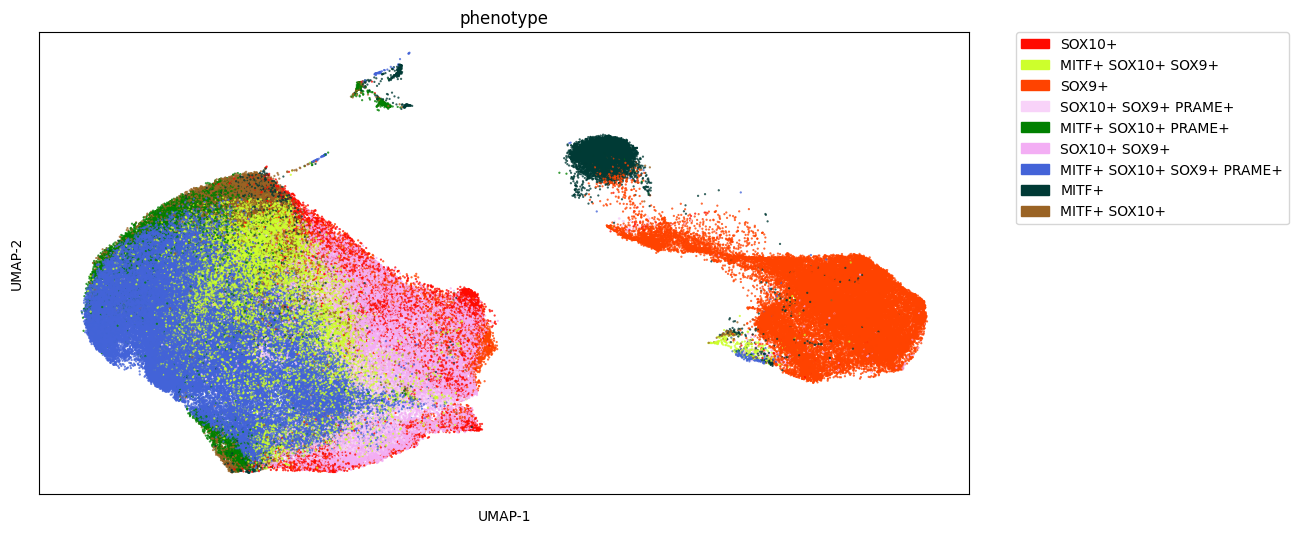

In [88]:
#henotype_subset = threshold_phenotype_by_prevalence(tumor_adata, threshold=0.01)

palettte = {
    "MITF+ SOX10+ PRAME+":"green",
    "MITF+ SOX10+ SOX9+ PRAME+": "#4363d8",
    "MITF+ SOX10+ NGFR+ PRAME+ ":"#3cb44b",
    "MITF+ SOX10+ NGFR+ SOX9+ PRAME+":"#42d4f4",
    "MITF+ SOX10+":"#9A6324",
}

umap(tumor_adata, 
        standardScale= True, 
    subset = phenotype_subset, figsize=(12,6),palette = palettte, layer='zscore', createLegend=True,
    #saveDir= project_dir,fileName= 'Case2-7_tumor_phenotype_umap.png'  
)

In [87]:
#phenotype_subset = threshold_phenotype_by_prevalence(tumor_adata, threshold=0.01)
#print(phenotype_subset)
phenotype_subset= ['MITF+ SOX10+ SOX9+ PRAME+', 'SOX9+', 'SOX10+ SOX9+', 'MITF+ SOX10+ SOX9+', 'MITF+ SOX10+ PRAME+', 'MITF+ SOX10+', 'SOX10+ SOX9+ PRAME+', 'SOX10+', 'MITF+']

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_9551/392991611.py:338: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



IndexError: list index out of range

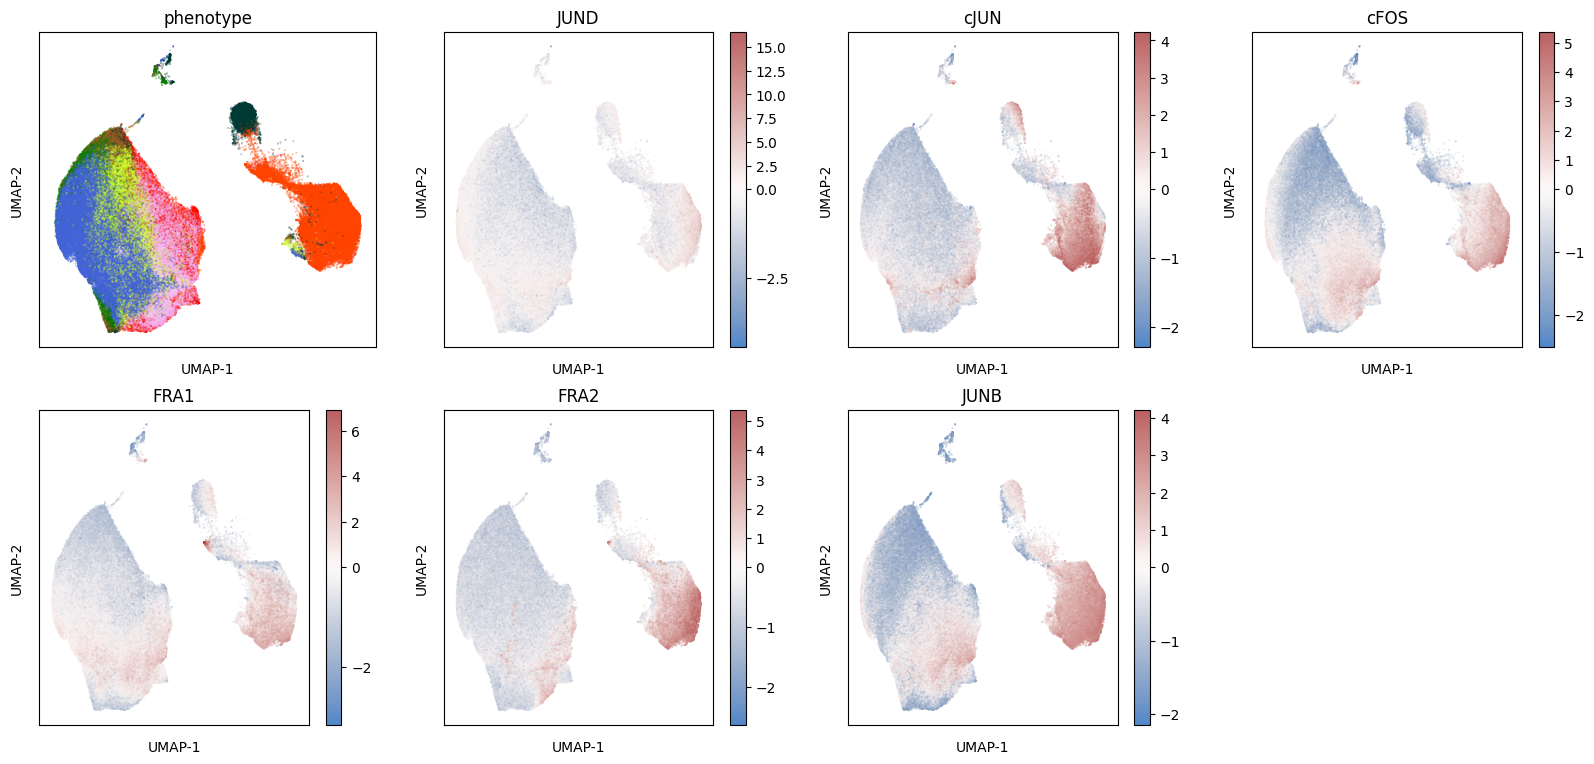

In [86]:
#phenotype_subset = threshold_phenotype_by_prevalence(tumor_adata, threshold=0.01)

palettte = {
    "MITF+ SOX10+ PRAME+":"green",
    "MITF+ SOX10+ SOX9+ PRAME+": "#4363d8",
    "MITF+ SOX10+ NGFR+ PRAME+ ":"#3cb44b",
    "MITF+ SOX10+ NGFR+ SOX9+ PRAME+":"#42d4f4",
    "MITF+ SOX10+":"#9A6324",
}

umap(tumor_adata, 
        standardScale= True, 
    subset = phenotype_subset, figsize=(20,9),
    palette = palettte, 
    layer='zscore', 
    color =['cFOS', 'cJUN', 'JUND', 'JUNB', 'FRA1', 'FRA2'], createLegend=False,
    #saveDir= project_dir,fileName= 'Case3-7_tumor_ap1_umap.png'  )
)

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_9551/392991611.py:338: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



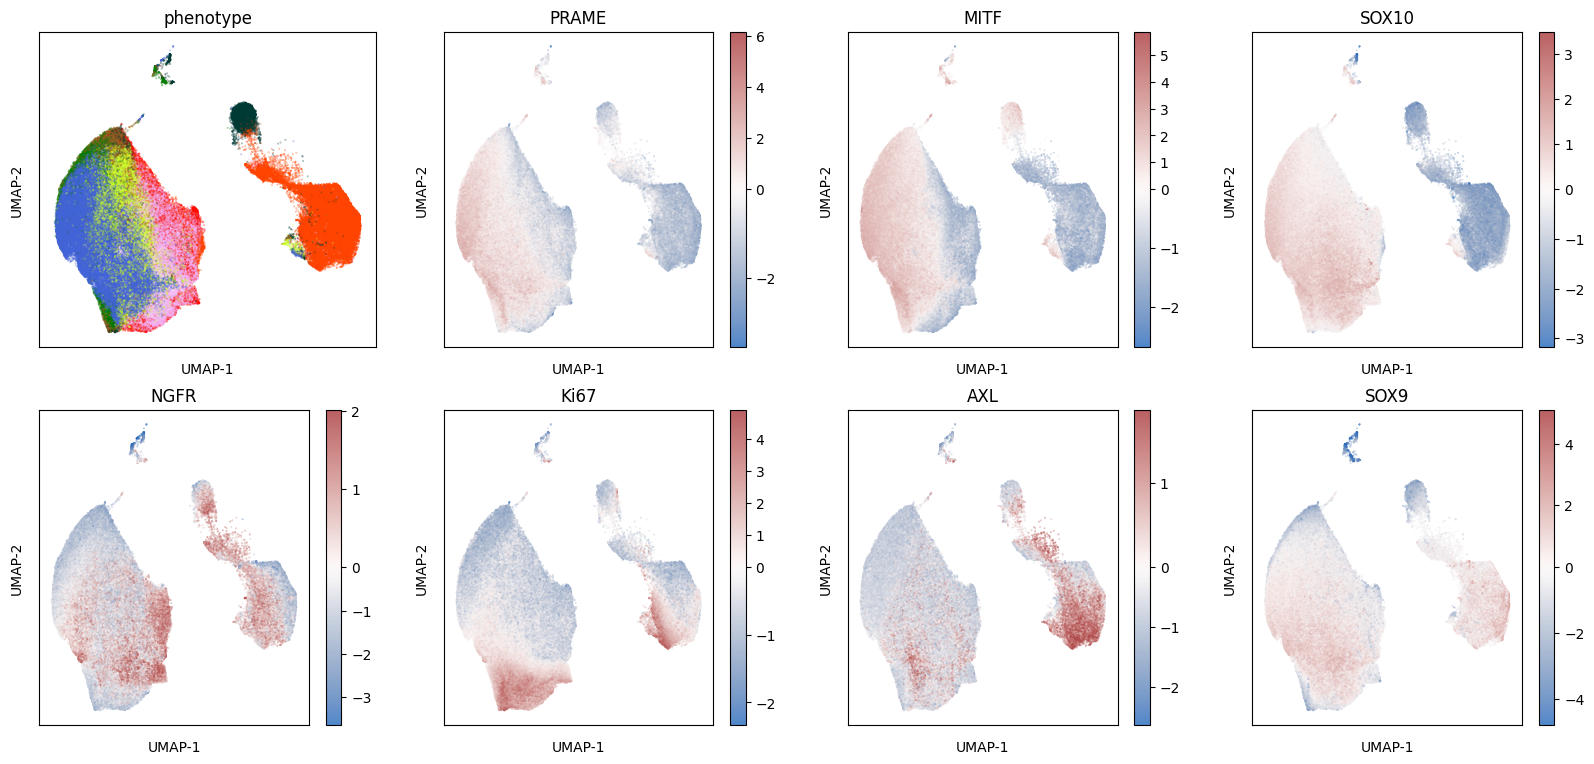

In [89]:
umap(tumor_adata, 
        standardScale= True, 
    subset = phenotype_subset, figsize=(20,9),palette = palettte, layer='zscore', createLegend = False, color =['MITF', 'NGFR','SOX9','PRAME','SOX10', 'AXL','Ki67',],
    #saveDir= project_dir,fileName= 'Case3-7_tumor_diffstate_umap.png'
     )

In [55]:
def spatial_scatterPlot(
    adata,
    colorBy,
    subsetPhenotype=None,
    topLayer=None,
    x_coordinate='X_centroid',
    y_coordinate='Y_centroid',
    imageid='imageid',
    layer=None,
    subset=None,
    s=None,
    ncols=None,
    alpha=1,
    dpi=200,
    fontsize=None,
    plotLegend=True,
    cmap='RdBu_r',
    catCmap='tab20',
    vmin=None,
    vmax=None,
    customColors=None,
    figsize=(5, 5),
    invert_yaxis=True,
    saveDir=None,
    fileName='scimapScatterPlot.png',
    **kwargs,
):
    """
    Parameters:
        adata (anndata.AnnData):  
            Pass the `adata` loaded into memory or a path to the `adata`
            file (.h5ad).

        colorBy (str):  
                The column name that will be used for color-coding the points. This can be
                either markers (data stored in `adata.var`) or observations (data stored in `adata.obs`).

        topLayer (list, optional):  
                A list of categories that should be plotted on the top layer. These categories
                must be present in the `colorBy` data. Helps to highlight cell types or cluster that is of interest.

        x_coordinate (str, optional):
            The column name in `spatial feature table` that records the
            X coordinates for each cell.

        y_coordinate (str, optional):
            The column name in `single-cell spatial table` that records the
            Y coordinates for each cell.

        imageid (str, optional):
            The column name in `spatial feature table` that contains the image ID
            for each cell.

        layer (str or None, optional):
            The layer in `adata.layers` that contains the expression data to use.
            If `None`, `adata.X` is used. use `raw` to use the data stored in `adata.raw.X`.

        subset (list or None, optional):
            `imageid` of a single or multiple images to be subsetted for plotting purposes.

        s (float, optional):
            The size of the markers.

        ncols (int, optional):
            The number of columns in the final plot when multiple variables are plotted.

        alpha (float, optional):
            The alpha value of the points (controls opacity).

        dpi (int, optional):
            The DPI of the figure.

        fontsize (int, optional):
            The size of the fonts in plot.

        plotLegend (bool, optional):
            Whether to include a legend.

        cmap (str, optional):
            The colormap to use for continuous data.

        catCmap (str, optional):
            The colormap to use for categorical data.

        vmin (float or None, optional):
            The minimum value of the color scale.

        vmax (float or None, optional):
            The maximum value of the color scale.

        customColors (dict or None, optional):
            A dictionary mapping color categories to colors.

        figsize (tuple, optional):
            The size of the figure. Default is (5, 5).

        invert_yaxis (bool, optional):
            Invert the Y-axis of the plot.

        saveDir (str or None, optional):
            The directory to save the output plot. If None, the plot will not be saved.

        fileName (str, optional):
            The name of the output file. Use desired file format as
            suffix (e.g. `.png` or `.pdf`). Default is 'scimapScatterPlot.png'.

        **kwargs:
            Additional keyword arguments to be passed to the matplotlib scatter function.


    Returns:
        Plot (image):
            If `saveDir` is provided the plot will saved within the
            provided saveDir.

    Example:
            ```python

            customColors = { 'Unknown' : '#e5e5e5',
                            'CD8+ T' : '#ffd166',
                            'Non T CD4+ cells' : '#06d6a0',
                            'CD4+ T' : '#118ab2',
                            'ECAD+' : '#ef476f',
                            'Immune' : '#073b4c',
                            'KI67+ ECAD+' : '#000000'
                }

            sm.pl.spatial_scatterPlot (adata=core6,
                             colorBy = ['ECAD', 'phenotype_gator'],
                             subset = 'unmicst-6_cellMask',
                             figsize=(4,4),
                             s=0.5,
                             plotLegend=True,
                             fontsize=3,
                             dpi=300,
                             vmin=0,
                             vmax=1,
                             customColors=customColors,
                             fileName='scimapScatterPlot.svg',
                             saveDir='/Users/aj/Downloads')


            ```

    """

    # Load the andata object
    if isinstance(adata, str):
        adata = ad.read_h5ad(adata)
    else:
        adata = adata.copy()

    # subset data if neede
    if subset is not None:
        if isinstance(subset, str):
            subset = [subset]
        if layer == 'raw':
            bdata = adata.copy()
            bdata.X = adata.raw.X
            bdata = bdata[bdata.obs[imageid].isin(subset)]
        else:
            bdata = adata.copy()
            bdata = bdata[bdata.obs[imageid].isin(subset)]
    else:
        bdata = adata.copy()

      # Subset data by phenotypes if needed
    if subsetPhenotype is not None:
        if isinstance(subsetPhenotype, str):
            subsetPhenotype = [subsetPhenotype]
        if not all(phenotype in bdata.obs['phenotype'].unique() for phenotype in subsetPhenotype):
            raise ValueError(
                f"One or more subset phenotypes '{subsetPhenotype}' not found in the data."
        )
        # Filter the data based on the phenotype
        bdata = bdata[bdata.obs['phenotype'].isin(subsetPhenotype)]
        
    # isolate the data
    if layer is None:
        data = pd.DataFrame(bdata.X, index=bdata.obs.index, columns=bdata.var.index)
    elif layer == 'raw':
        data = pd.DataFrame(bdata.raw.X, index=bdata.obs.index, columns=bdata.var.index)
    else:
        data = pd.DataFrame(
            bdata.layers[layer], index=bdata.obs.index, columns=bdata.var.index
        )

    # isolate the meta data
    meta = bdata.obs

    # toplayer logic
    if isinstance(topLayer, str):
        topLayer = [topLayer]

    # identify the things to color
    if isinstance(colorBy, str):
        colorBy = [colorBy]
    # extract columns from data and meta
    data_cols = [col for col in data.columns if col in colorBy]
    meta_cols = [col for col in meta.columns if col in colorBy]
    # combine extracted columns from data and meta
    colorColumns = pd.concat([data[data_cols], meta[meta_cols]], axis=1)

    # identify the x and y coordinates
    x = meta[x_coordinate]
    y = meta[y_coordinate]

    # auto identify rows and columns in the grid plot
    def calculate_grid_dimensions(num_items, num_columns=None):
        """
        Calculates the number of rows and columns for a square grid
        based on the number of items.
        """
        if num_columns is None:
            num_rows_columns = int(math.ceil(math.sqrt(num_items)))
            return num_rows_columns, num_rows_columns
        else:
            num_rows = int(math.ceil(num_items / num_columns))
            return num_rows, num_columns

    # calculate the number of rows and columns
    nrows, ncols = calculate_grid_dimensions(
        len(colorColumns.columns), num_columns=ncols
    )

    # resolve figsize
    # figsize = (figsize[0]*ncols, figsize[1]*nrows)

    # Estimate point size
    if s is None:
        s = (10000 / bdata.shape[0]) / len(colorColumns.columns)

    # Define the categorical colormap (optional)
    cmap_cat = plt.get_cmap(catCmap)

    # FIIGURE
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, dpi=dpi)

    # Flatten the axs array for easier indexing
    if nrows == 1 and ncols == 1:
        axs = [axs]  # wrap single subplot in a list
    else:
        axs = axs.flatten()

    # Loop over the columns of the DataFrame
    for i, col in enumerate(colorColumns):
        # Select the current axis
        ax = axs[i]

        # invert y-axis
        if invert_yaxis is True:
            ax.invert_yaxis()

        # Scatter plot for continuous data
        if colorColumns[col].dtype.kind in 'iufc':
            scatter = ax.scatter(
                x=x,
                y=y,
                c=colorColumns[col],
                cmap=cmap,
                s=s,
                vmin=vmin,
                vmax=vmax,
                linewidths=0,
                alpha=alpha,
                **kwargs,
            )
            if plotLegend is True:
                cbar = plt.colorbar(scatter, ax=ax, pad=0)
                cbar.ax.tick_params(labelsize=fontsize)

        # Scatter plot for categorical data
        else:
            # Get the unique categories in the column
            categories = colorColumns[col].unique()

            # Map the categories to colors using either the custom colors or the categorical colormap
            if customColors:
                colors = {
                    cat: customColors[cat] for cat in categories if cat in customColors
                }
            else:
                colors = {cat: cmap_cat(i) for i, cat in enumerate(categories)}

            # Ensure topLayer categories are plotted last
            categories_to_plot_last = (
                [cat for cat in topLayer if cat in categories] if topLayer else []
            )
            categories_to_plot_first = [
                cat for cat in categories if cat not in categories_to_plot_last
            ]

            # Plot non-topLayer categories first
            for cat in categories_to_plot_first:
                cat_mask = colorColumns[col] == cat
                ax.scatter(
                    x=x[cat_mask],
                    y=y[cat_mask],
                    c=[colors.get(cat, cmap_cat(np.where(categories == cat)[0][0]))],
                    s=s,
                    linewidths=0,
                    alpha=alpha,
                    **kwargs,
                )

            # Then plot topLayer categories
            for cat in categories_to_plot_last:
                cat_mask = colorColumns[col] == cat
                ax.scatter(
                    x=x[cat_mask],
                    y=y[cat_mask],
                    c=[colors.get(cat, cmap_cat(np.where(categories == cat)[0][0]))],
                    s=s,
                    linewidths=0,
                    alpha=alpha,
                    **kwargs,
                )

            if plotLegend is True:
                # Adjust legend to include all categories
                handles = [
                    mpatches.Patch(
                        color=colors.get(
                            cat, cmap_cat(np.where(categories == cat)[0][0])
                        ),
                        label=cat,
                    )
                    for cat in categories
                ]
                ax.legend(
                    handles=handles,
                    bbox_to_anchor=(1.0, 1.0),
                    loc='upper left',
                    bbox_transform=ax.transAxes,
                    fontsize=fontsize,
                )

        ax.set_title(col)  # fontsize=fontsize
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])

    # Remove any empty subplots
    num_plots = len(colorColumns.columns)
    for i in range(num_plots, nrows * ncols):
        ax = axs[i]
        fig.delaxes(ax)

    # Adjust the layout of the subplots grid
    plt.tick_params(axis='both', labelsize=fontsize)
    plt.tight_layout()

    # save figure
    if saveDir:
        if not os.path.exists(saveDir):
            os.makedirs(saveDir)
        full_path = os.path.join(saveDir, fileName)
        plt.savefig(full_path, dpi=dpi)
        plt.close()
        print(f"Saved plot to {full_path}")
    else:
        plt.show()

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_9551/4204152220.py:352: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



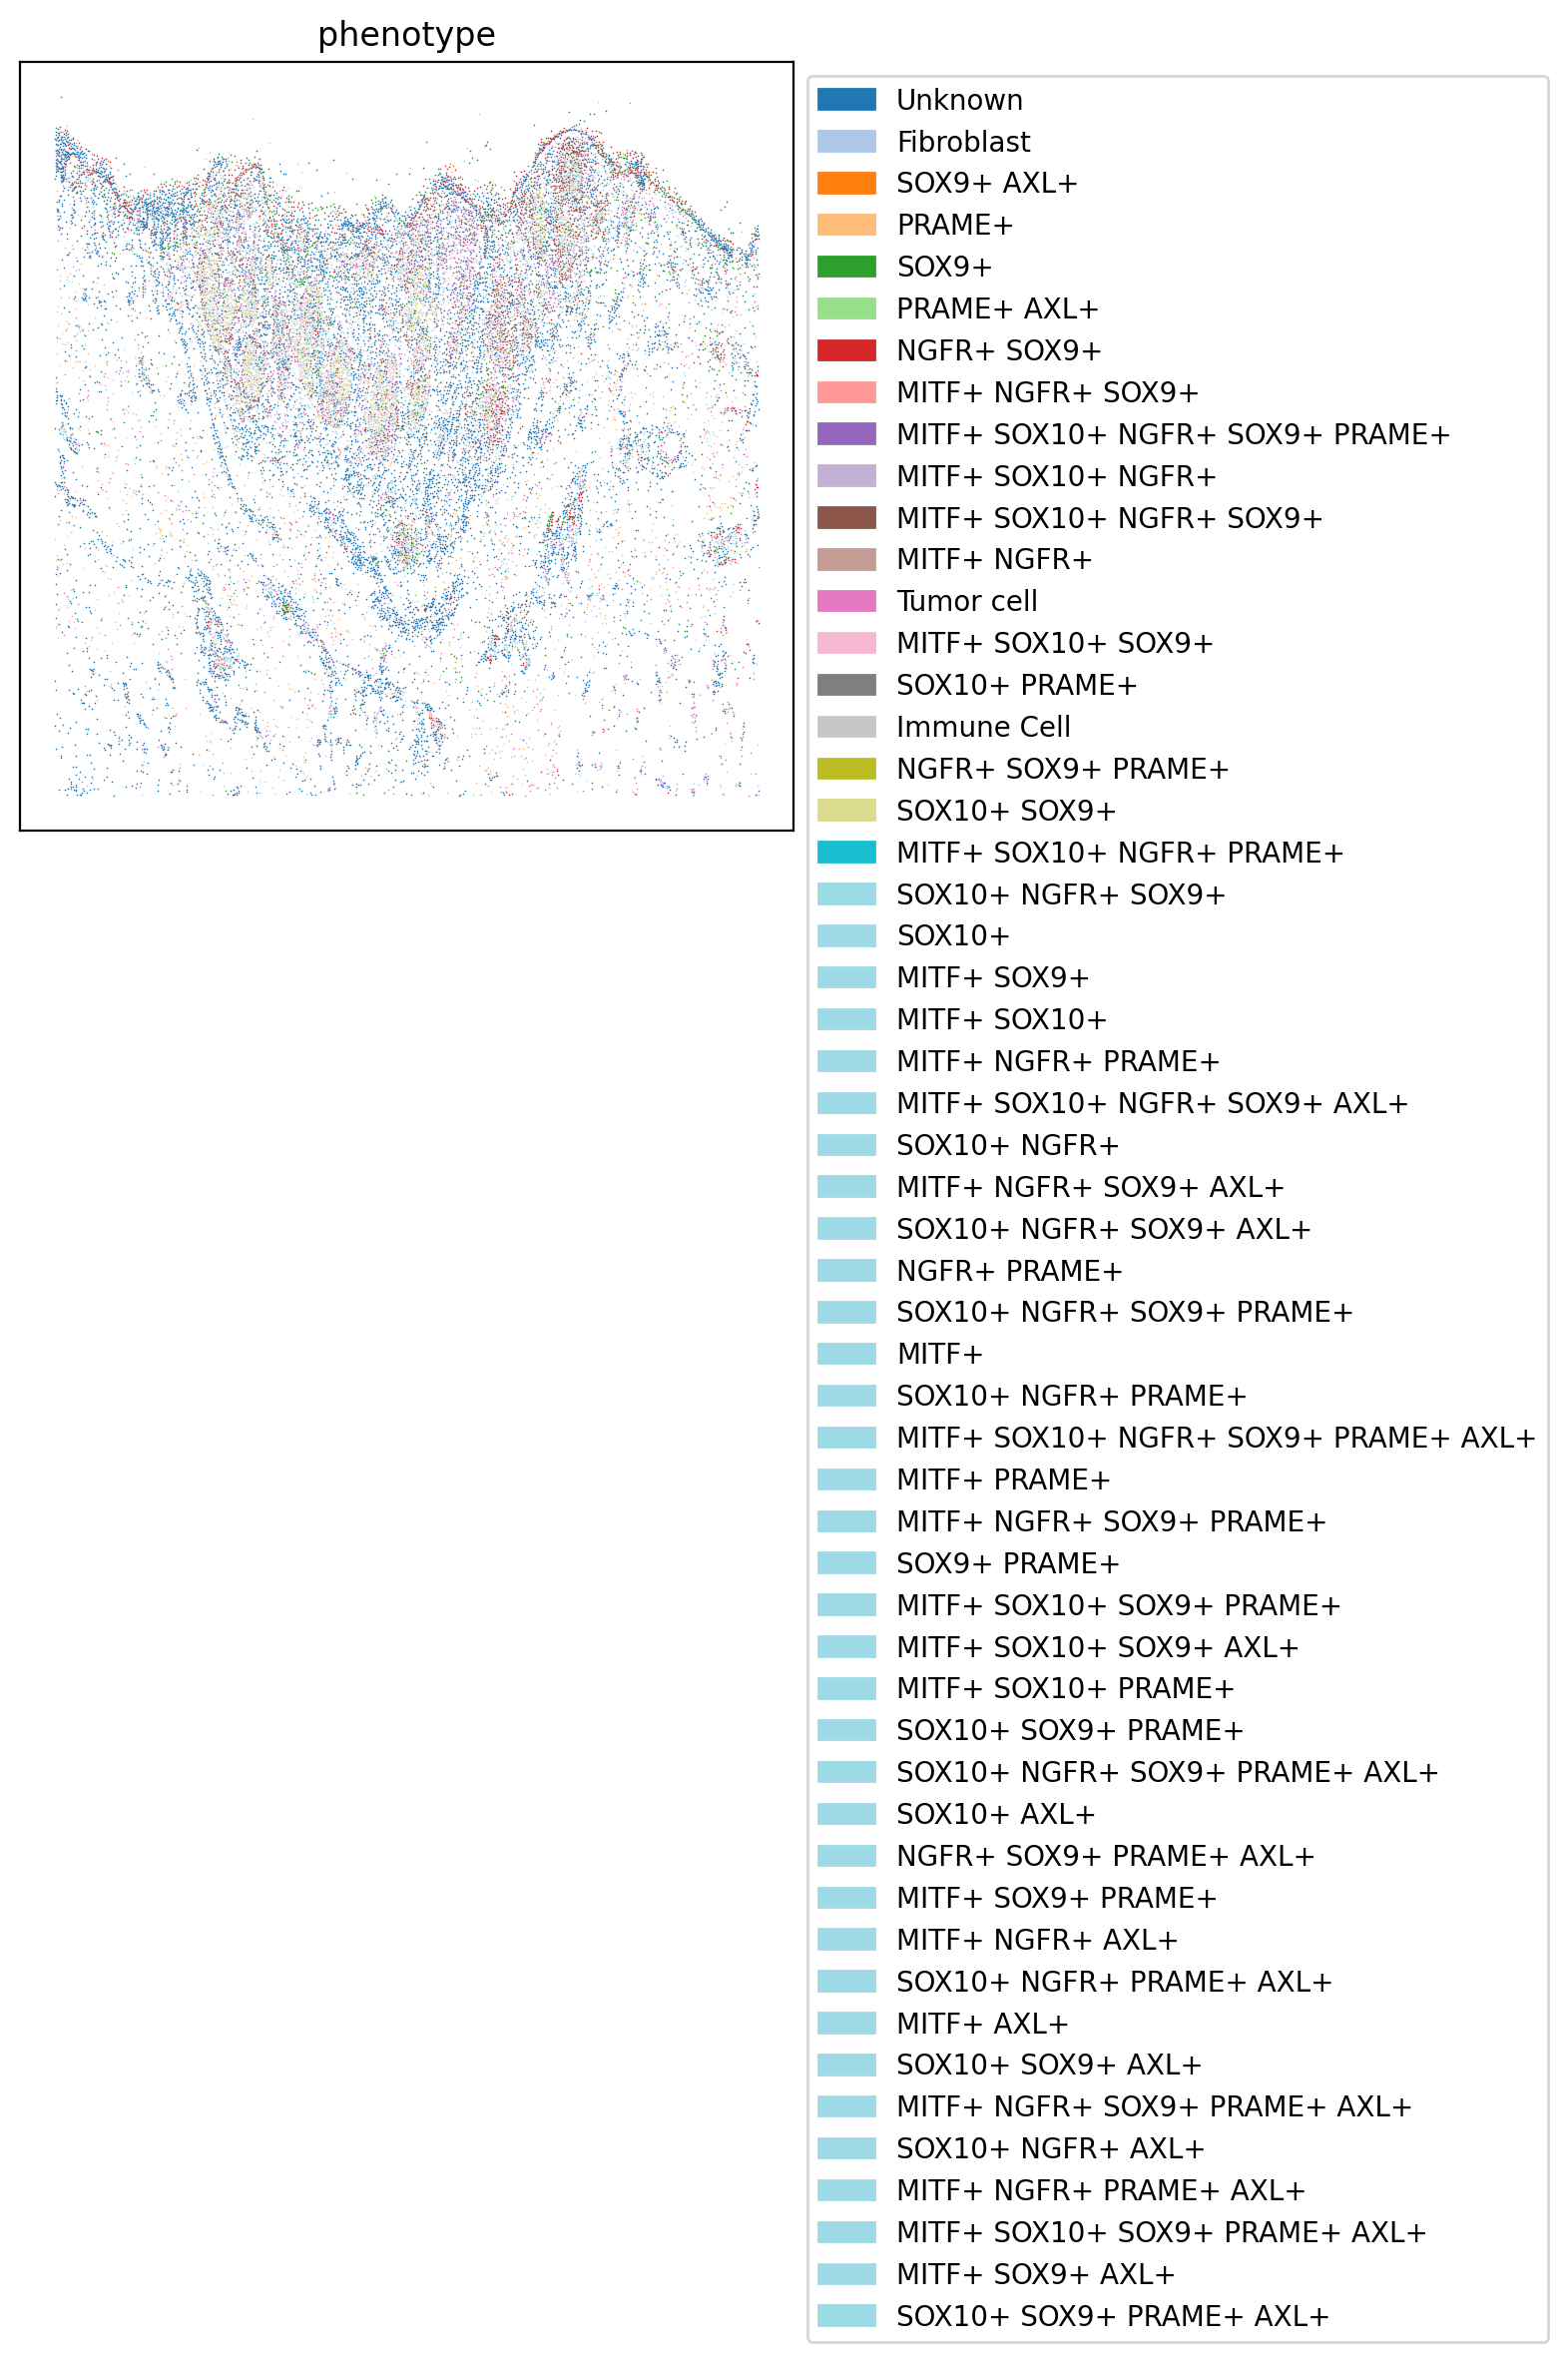

In [124]:
spatial_scatterPlot(adata, subsetPhenotype = None, colorBy = ['phenotype'], customColors=None,)

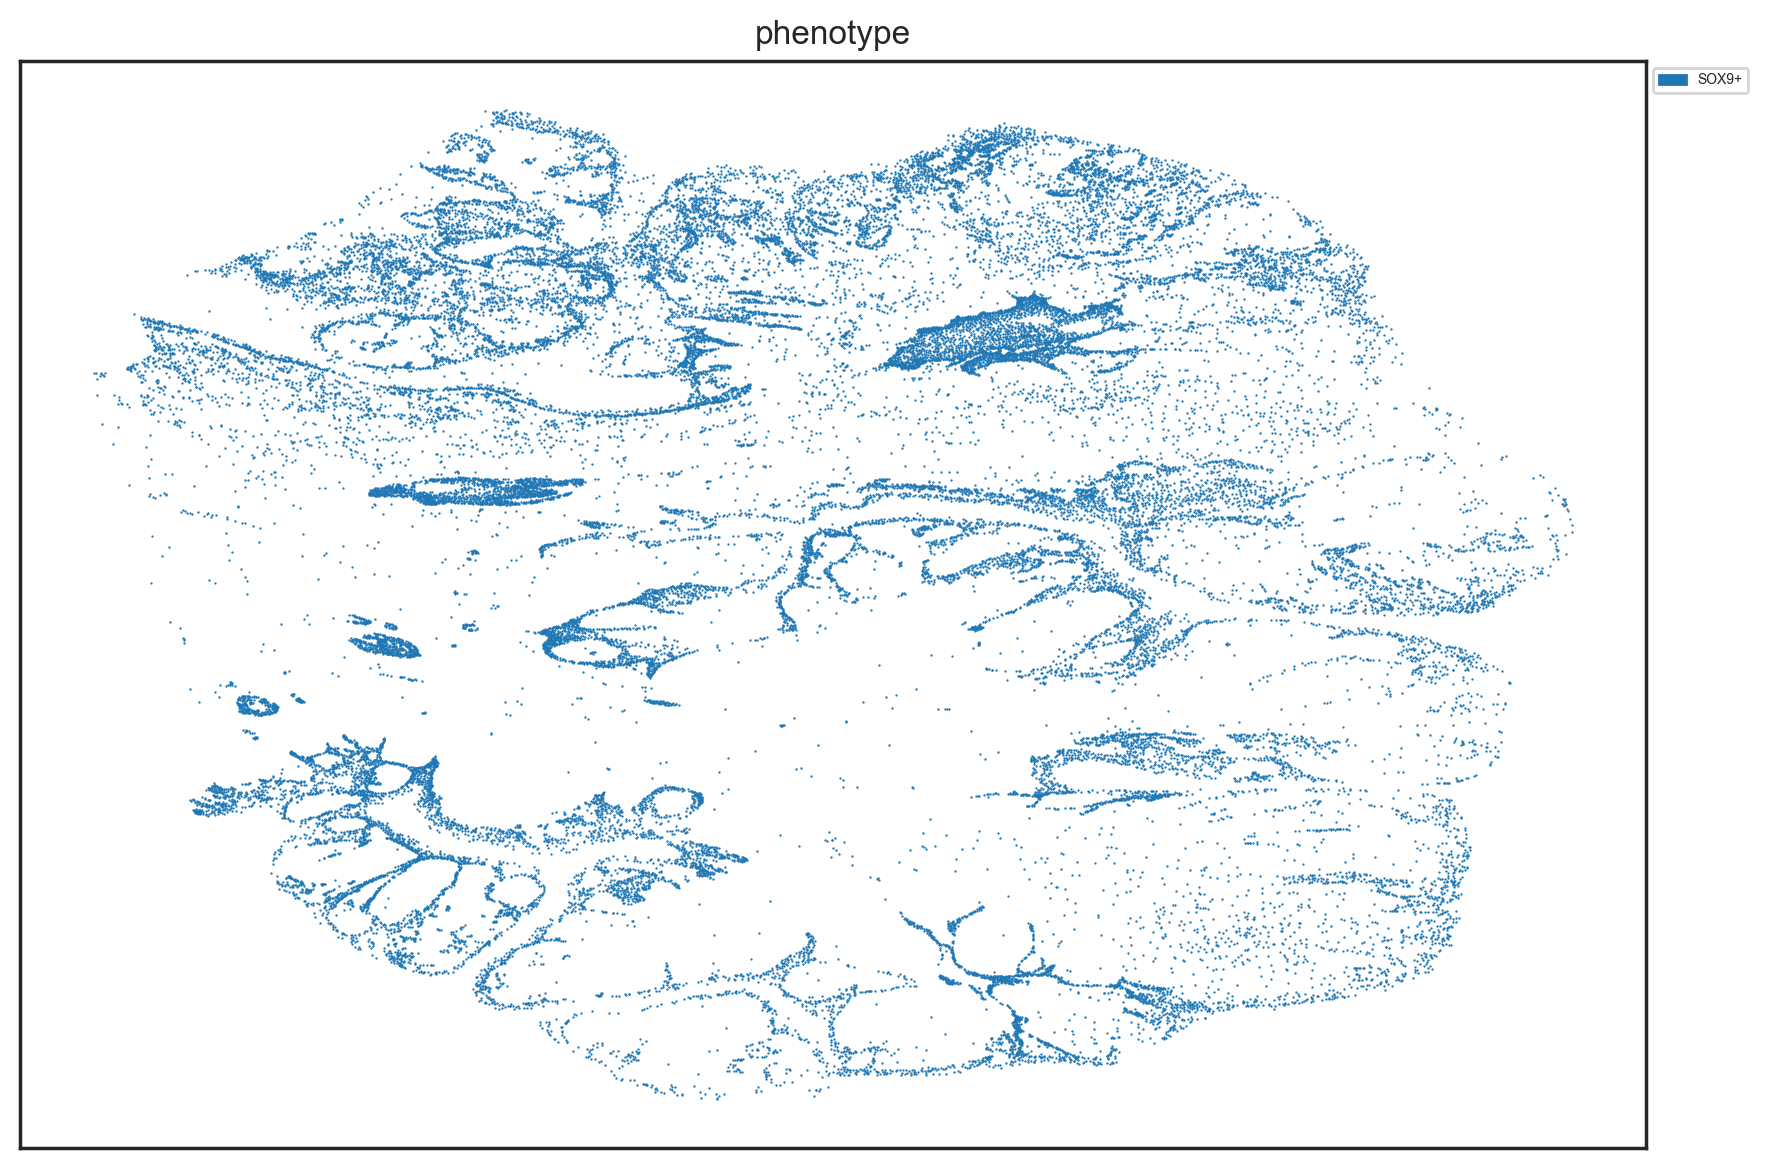

In [56]:
spatial_scatterPlot(tumor_adata, subsetPhenotype = ["SOX9+"], colorBy = ['phenotype'], customColors=None,
                          figsize=(9,6), s=0.7, fontsize=5)

In [491]:
adata.obs['phenotype'].unique()

['Unknown', 'MITF+ NGFR+ SOX9+ AXL+', 'MITF+', 'MITF+ NGFR+ SOX9+', 'MITF+ SOX9+', ..., 'NGFR+ SOX9+ PRAME+ AXL+', 'MITF+ SOX9+ PRAME+', 'SOX9+ PRAME+', 'NGFR+ SOX9+ PRAME+', 'MITF+ SOX9+ PRAME+ AXL+']
Length: 63
Categories (63, object): ['AXL+', 'Fibroblast', 'Immune Cell', 'MITF+', ..., 'SOX10+ SOX9+ AXL+', 'SOX10+ SOX9+ PRAME+', 'SOX10+ SOX9+ PRAME+ AXL+', 'Unknown']

In [578]:
print(project_dir + 'Case3-7_tumor_diffstate_umap.png')

/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/feature_extraction_all/Case3-7/Case3-7_tumor_diffstate_umap.png
